# Netflix Shows 2025 - Exploratory Data Analysis & Predictive Modeling

* **Business Question**: Can we predict whether a newly launched Netflix show will be successful using historical show attributes?
* **Context**: With growing content on Netflix, predicting the success of a show before launch can help optimize content investment, marketing strategy, and audience targeting. Success can be defined by high audience ratings or popularity.
* **Goal**: To build a supervised machine learning model to classify whether a show will be successful or not based on historical attributes such as genre, language, release year, rating, popularity, etc.
* **Target Variable**: A binary variable — 'Success' (1) or 'Not Success' (0), derived from vote_average or popularity thresholds.


# Tools & Libraries Used

* Python
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Jupyter Notebook
* Sklearn

## 1. Import Libraries & Load Data

In [212]:
# Importing relevant libraries & modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate

In [2]:
# Loading the dataset

df = pd.read_csv(r'C:\Users\Win10\Documents\Python Code\Netflix Shows - Predictive Modeling\netflixshows2025.csv')

## 2. Exploratory Data Analysis

In [3]:
# Displaying the first few rows of the data

df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average
0,33238,TV Show,Running Man,안재철,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",South Korea,7/11/2010,2010,8.241,1 Seasons,"Comedy, Reality",ko,A reality and competition show where members a...,1929.898,187,8.241
1,32415,TV Show,Conan,NaN,"Conan O'Brien, Andy Richter",United States of America,11/8/2010,2010,7.035,1 Seasons,"Talk, Comedy, News",en,A late night television talk show hosted by C...,1670.580,229,7.035
2,37757,TV Show,MasterChef Greece,NaN,NaN,Greece,10/3/2010,2010,5.600,1 Seasons,Reality,el,MasterChef Greece is a Greek competitive cooki...,1317.092,6,5.600
3,75685,TV Show,Prostřeno!,NaN,"Václav Vydra, Jana Boušková",Czech Republic,3/1/2010,2010,6.500,1 Seasons,Reality,cs,The knives (and forks) are out as a group of s...,1095.776,6,6.500
4,33847,TV Show,The Talk,NaN,"Amanda Kloots, Jerry O'Connell, Akbar Gbaja-Bi...","United States of America, Ireland",10/18/2010,2010,3.400,1 Seasons,Talk,en,A panel of well-known news and entertainment p...,712.070,12,3.400
5,250253,TV Show,Euphrosyne,"Maxim Mokrushev, Oleg Maslennikov","Anastasiya Makarova, Valeriy Zolotukhin, Irina...",NaN,2/15/2010,2010,0.000,1 Seasons,"Drama, Soap",ru,NaN,629.982,0,0.000
6,32798,TV Show,Hawaii Five-0,NaN,"Alex O'Loughlin, Scott Caan, Ian Anthony Dale,...","United States of America, Singapore",9/20/2010,2010,7.800,1 Seasons,"Crime, Drama, Action & Adventure",en,"Steve McGarrett returns home to Oahu, in order...",616.862,1750,7.800
7,1402,TV Show,The Walking Dead,NaN,"Lauren Cohan, Norman Reedus, Jeffrey Dean Morg...",United States of America,10/31/2010,2010,8.103,1 Seasons,"Action & Adventure, Drama, Sci-Fi & Fantasy",en,Sheriff's deputy Rick Grimes awakens from a co...,485.660,16790,8.103
8,33384,TV Show,Zone,NaN,"Michael Underwood, Angellica Bell",United States of America,5/20/2010,2010,0.000,1 Seasons,NaN,en,The Zone is the name given to a shopping and g...,489.739,0,0.000
9,31132,TV Show,Regular Show,NaN,"J.G. Quintel, William Salyers, Mark Hamill, Sa...",United States of America,9/6/2010,2010,8.621,1 Seasons,"Animation, Comedy",en,The surreal misadventures of two best friends ...,426.107,2045,8.621


In [4]:
# Displaying column names & its data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      5035 non-null   object 
 4   cast          14843 non-null  object 
 5   country       14203 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      16000 non-null  object 
 10  genres        15026 non-null  object 
 11  language      16000 non-null  object 
 12  description   12794 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
dtypes: float64(3), int64(3), object(10)
memory usage: 2.0+ MB


In [5]:
# Converting the column of data to proper format

df['date_added'] = pd.to_datetime(df['date_added'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       16000 non-null  int64         
 1   type          16000 non-null  object        
 2   title         16000 non-null  object        
 3   director      5035 non-null   object        
 4   cast          14843 non-null  object        
 5   country       14203 non-null  object        
 6   date_added    16000 non-null  datetime64[ns]
 7   release_year  16000 non-null  int64         
 8   rating        16000 non-null  float64       
 9   duration      16000 non-null  object        
 10  genres        15026 non-null  object        
 11  language      16000 non-null  object        
 12  description   12794 non-null  object        
 13  popularity    16000 non-null  float64       
 14  vote_count    16000 non-null  int64         
 15  vote_average  16000 non-null  float6

In [7]:
# Checking for null values

df.isna().sum()

show_id             0
type                0
title               0
director        10965
cast             1157
country          1797
date_added          0
release_year        0
rating              0
duration            0
genres            974
language            0
description      3206
popularity          0
vote_count          0
vote_average        0
dtype: int64

In [8]:
# Checking for duplicate values

df.duplicated().sum()

0

In [9]:
# Preserving raw dataset

df_original = df.copy()

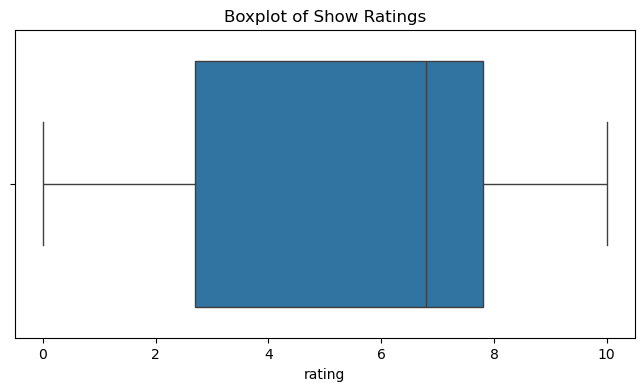

Text(0.5, 1.0, 'Distribution of Ratings')

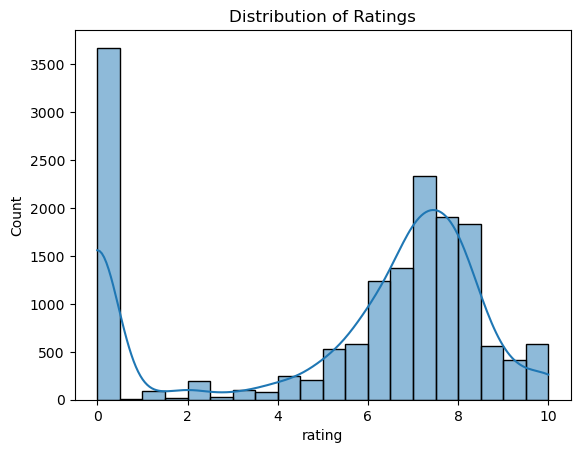

In [10]:
# Checking for outliers

plot.figure(figsize=(8,4))
sns.boxplot(x=df['rating'])
plot.title('Boxplot of Show Ratings')
plot.show()

sns.histplot(x=df['rating'], kde=True, bins=20)
plot.title('Distribution of Ratings')

### Insights:
* No extreme outliers as the boxplot shows most values between 2.5 to 8.
* Median rating appears to be around 7.0.
* In the histogram plot, there is a large spike near 0, followed by an upward slope peaking around 7–8.
* The tail is on the left, and most values are clustered toward the right side of the x-axis.
* The plot appears to be left-skewed (negatively skewed).

In [11]:
# Removing invalid ratings

df = df[df['rating'] > 0]

In [13]:
# Converting rating column to a target variable
# Assuming a show is successful if rating >= 7.5

df['success'] = df['rating'].apply(lambda x: 1 if x >= 7.5 else 0)

### Analysis:
* We removed the invalid ratings from the column and created a new column with the name `success` for our classification task.
* We assumed a threshold of 7.5 to determine whether a show would be successful or not.
* As per our earlier analysis, the column of `director` contains 68% of missing values. The columns of `cast` and `description` also contain missing values and may not be useful unless we are focusing on advance feature engineering. Considering the scope of this project, we decided to drop the columns of `rating`, `director`, `cast` and `description`.
* We will impute missing values in the columns of `genres` and `country` as these columns still carry predictive signals. Certain genres like drama, thriller, etc. perform better.
* Some countries may have a higher production value or content style that earns higher ratings.
* Even if we are not determining success by country, these are important categorical predictors of success.

In [14]:
# Removing irrelavant columns
df.drop(['rating', 'director', 'cast', 'description'], axis=1, inplace=True)

# Filling missing values in the columns of genre and country
df['genres'] = df['genres'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [15]:
df.head()

,show_id,type,title,country,date_added,release_year,duration,genres,language,popularity,vote_count,vote_average,success
0,33238,TV Show,Running Man,South Korea,2010-07-11,2010,1 Seasons,"Comedy, Reality",ko,1929.898,187,8.241,1
1,32415,TV Show,Conan,United States of America,2010-11-08,2010,1 Seasons,"Talk, Comedy, News",en,1670.580,229,7.035,0
2,37757,TV Show,MasterChef Greece,Greece,2010-10-03,2010,1 Seasons,Reality,el,1317.092,6,5.600,0
3,75685,TV Show,Prostřeno!,Czech Republic,2010-03-01,2010,1 Seasons,Reality,cs,1095.776,6,6.500,0
4,33847,TV Show,The Talk,"United States of America, Ireland",2010-10-18,2010,1 Seasons,Talk,en,712.070,12,3.400,0


In [16]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
duration        0
genres          0
language        0
popularity      0
vote_count      0
vote_average    0
success         0
dtype: int64

In [17]:
# Checking for class imbalance

df['success'].value_counts(normalize=True)

success
0    0.570293
1    0.429707
Name: proportion, dtype: float64

### Insights:
* Class imbalance is not of much concern as per the above output. Class imbalance is totally manageable here.

In [16]:
df['duration'].unique()

array(['1 Seasons'], dtype=object)

In [18]:
# Proceeding with removing other columns as well which won't add predictor value
# show_id - Just an identifier
# type - we are already working on a dataset of shows
# title - unique for each row so can't be generalized
# date_added - redundant with release_year and not likely helpful for prediction here
# duration - Only one value, no variability so not useful

df.drop(['show_id', 'type', 'title', 'date_added', 'duration'], axis=1,inplace=True)

In [19]:
df.head()

,country,release_year,genres,language,popularity,vote_count,vote_average,success
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0
2,Greece,2010,Reality,el,1317.092,6,5.600,0
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0


### Data Visualizations
* Examining the variable we are interested in and creating plots to visualize the relationships between variables in the data

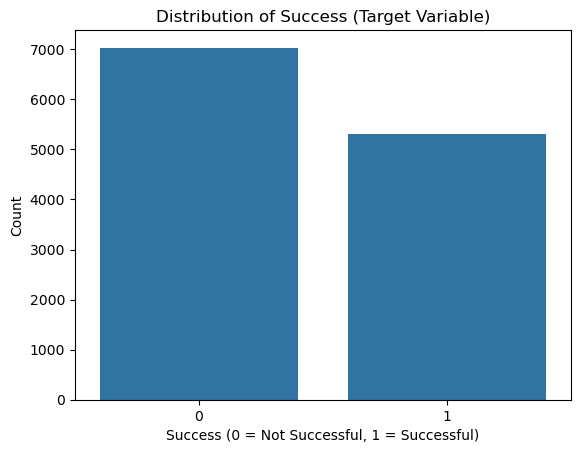

In [20]:
# Success distribution to confirm the class imbalance visually

sns.countplot(x=df['success'])
plot.title('Distribution of Success (Target Variable)')
plot.xlabel('Success (0 = Not Successful, 1 = Successful)')
plot.ylabel('Count')
plot.show()

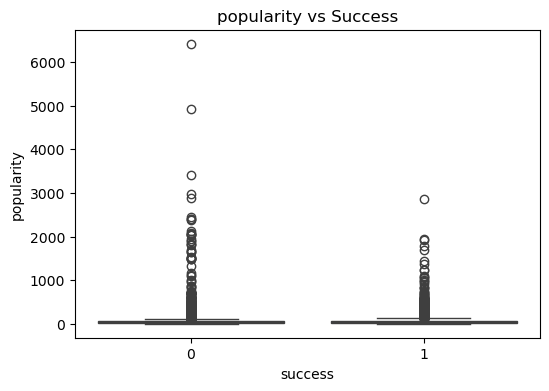

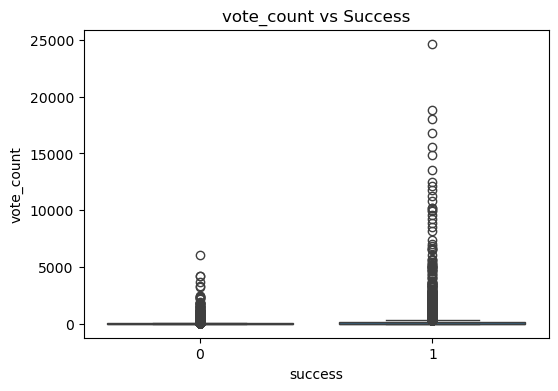

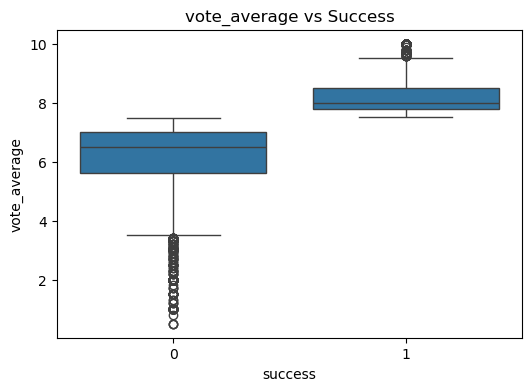

In [21]:
# Identifying the relationships between our numerical predictor variables like popularity, vote_count and vote_average with that of success

numerics = ['popularity', 'vote_count', 'vote_average']
for col in numerics:
    plot.figure(figsize=(6,4))
    sns.boxplot(x='success', y=col, data=df)
    plot.title(f'{col} vs Success')
    plot.show()
    

### Insights:
* 1. `vote_average` vs `success`:
     * We can see a clear separation between successful and unsuccessful shows.
     * Success = 1 has consistently higher vote_average (mostly above 7.5)
     * Success = 0 spans a wider and lower range
     * This feature seems very predictive.
  2. `vote_count` vs `success`:
     * Both the classes have outliers.
     * But success = 1 shows a higher spread and more high vote_count values.
     * May be useful with transformation or in combination with other features.
  3. `popularity` vs `success`:
     * Very high variance and many outliers
     * The median is slightly higher for success = 1
     * Less distinct than `vote_average`
     * Might benefit from log transformation

<Axes: xlabel='popularity', ylabel='Count'>

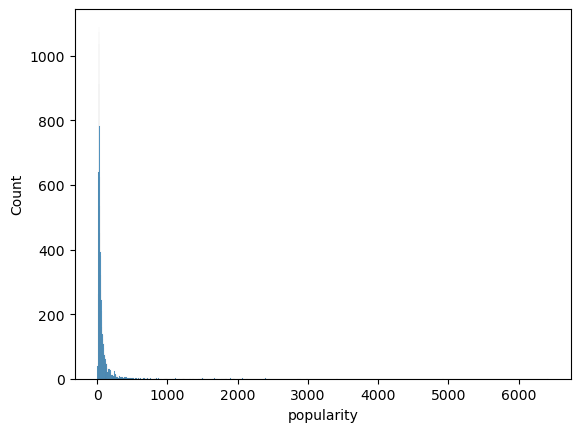

In [224]:
sns.histplot(x='popularity', data=df)

In [226]:
percentile25 = df['popularity'].quantile(0.25)

percentile75 = df['popularity'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

outliers = df[(df['popularity'] > upper_limit) | (df['popularity'] < lower_limit)].shape[0]
print(outliers)

1269


<Axes: xlabel='vote_count', ylabel='Count'>

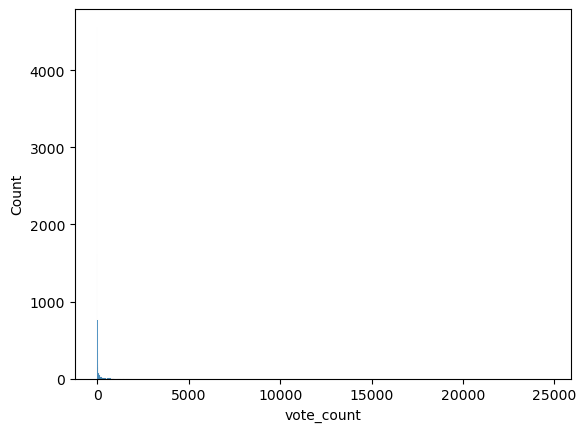

In [227]:
sns.histplot(x='vote_count', data=df)

In [228]:
percentile25 = df['vote_count'].quantile(0.25)

percentile75 = df['vote_count'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

outliers = df[(df['vote_count'] > upper_limit) | (df['vote_count'] < lower_limit)].shape[0]
print(outliers)

1872


In [22]:
print(df['language'].nunique())
print(df['country'].nunique())

64
528


### Insights:
* There are 64 unique languages.
* There are 528 unique countries which indicates that this column is multi labeled, one row with multiple categories. We will have to split this column along with genres before proceeding with one hot encoding of these columns.

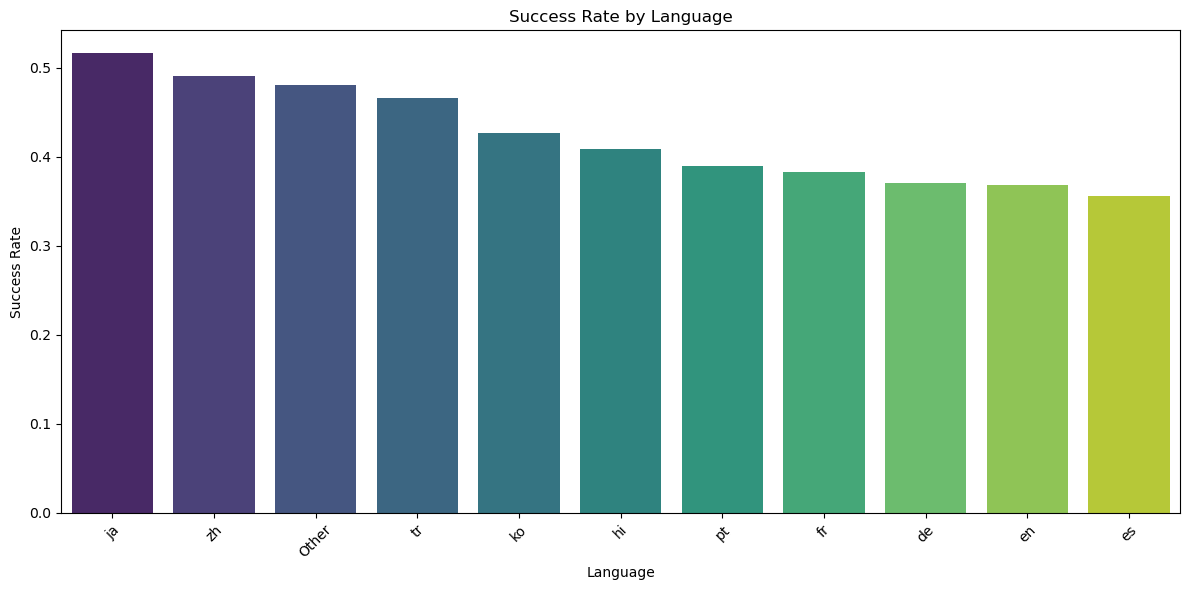

In [23]:
# For now, let's visualize the distribution of categorical feature language with success

# Grouping rare languages into other
top_lang = df['language'].value_counts().nlargest(10).index
df['language_grouped'] = df['language'].apply(lambda x: x if x in top_lang else 'Other')

# Calculating success rate per language
language_success = df.groupby('language_grouped')['success'].mean().sort_values(ascending=False).reset_index()

# Plot
plot.figure(figsize=(12, 6))
sns.barplot(x='language_grouped', y='success', hue='language_grouped', data=language_success, palette='viridis')
plot.title('Success Rate by Language')
plot.ylabel('Success Rate')
plot.xlabel('Language')
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

### Insights:
* Japanese (ja) shows the highest success rate, with over 50% of its shows marked as successful.
* Chinese (zh) and Other languages also perform well, both nearing a 50% success rate.
* Turkish (tr), Korean (ko), and Hindi (hi) follow closely behind, showing moderate success.
* Portuguese (pt), French (fr), German (de), English (en), and Spanish (es) show comparatively lower success rates, with Spanish at the bottom among the top 10 languages, around 35%.
* Non-English content, especially from East Asian and Middle Eastern regions, seems to have better success rates compared to English-language shows.
* This might suggest a strong local audience or niche popularity for regional language content.
* The lower success rate for English content could be due to larger volume and higher competition, making it harder for each show to stand out.

In [24]:
# Splitting the column of genres

df['genres_split'] = df['genres'].fillna('Unknown').apply(lambda x: [i.strip() for i in x.split(',')])

In [25]:
df.head()

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,"[Comedy, Reality]"
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,"[Talk, Comedy, News]"
2,Greece,2010,Reality,el,1317.092,6,5.600,0,Other,[Reality]
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0,Other,[Reality]
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk]


In [26]:
# Exploding the list of genres into individual rows so that we can analyze each row independently

df_genre_exploded = df.explode('genres_split')
df_genre_exploded

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,Comedy
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,Reality
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,Talk
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,Comedy
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,News
...,...,...,...,...,...,...,...,...,...,...
15986,Unknown,2025,"Comedy, Family",it,3.361,1,10.000,1,Other,Family
15987,China,2025,"Drama, Sci-Fi & Fantasy",zh,5.286,1,6.000,0,zh,Drama
15987,China,2025,"Drama, Sci-Fi & Fantasy",zh,5.286,1,6.000,0,zh,Sci-Fi & Fantasy
15993,Sweden,2025,Documentary,sv,2.418,1,5.000,0,Other,Documentary


In [28]:
# Grouping by genre and calculating average success rate

genre_success = df_genre_exploded.groupby('genres_split')['success'].mean().sort_values(ascending=False).reset_index()
genre_success

,genres_split,success
0,Sci-Fi & Fantasy,0.524370
1,Action & Adventure,0.523678
2,Animation,0.511464
3,War & Politics,0.508197
4,Documentary,0.504673
5,Kids,0.480826
6,Western,0.461538
7,Mystery,0.458961
8,Crime,0.445038
9,Drama,0.438343


C:\Users\Win10\AppData\Local\Temp\ipykernel_760\4019385611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genres_split', y='success', data=genre_success, palette='coolwarm')


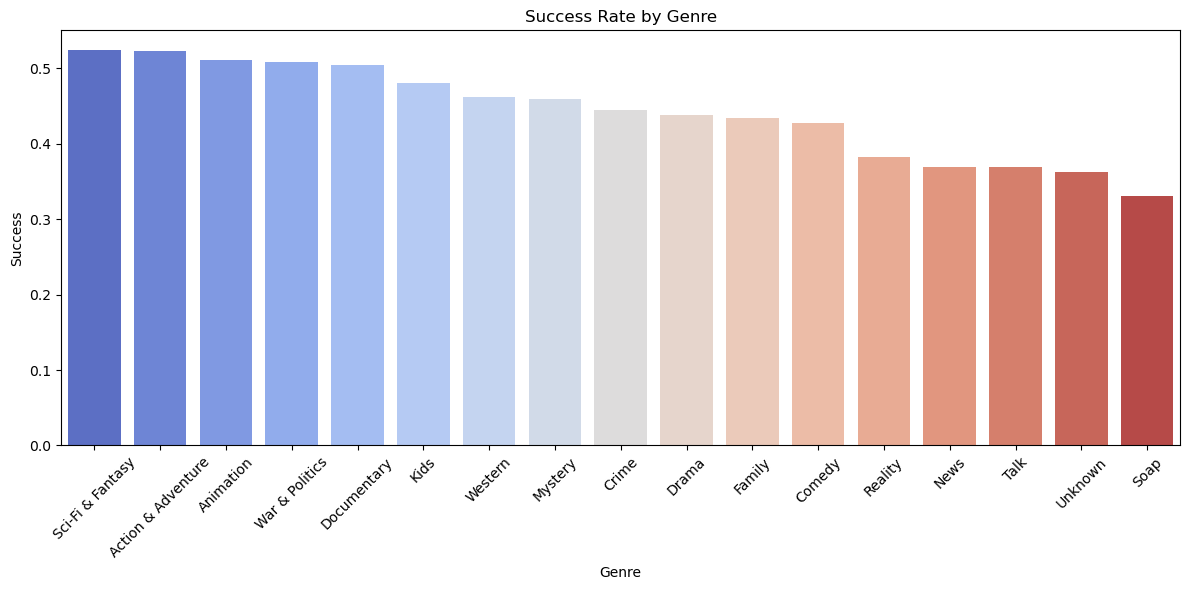

In [29]:
# Plotting the graph between genres_split and success

plot.figure(figsize=(12,6))
sns.barplot(x='genres_split', y='success', data=genre_success, palette='coolwarm')
plot.title('Success Rate by Genre')
plot.xlabel('Genre')
plot.ylabel('Success')
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

### Insights:
* **Sci-Fi & Fantasy** shows a success rate of more than 50% making it the top performing genre in terms of viewer reception or the criteria we defined for `success`.
* Other high performing `genres` include **Action & Adventure**, **Animation** & **War & Politics** and low performing genres include **Reality**, **News**, **Talk** and **Soap**.

In [30]:
# Splitting the column of countries 

df['country_split'] = df['country'].fillna('Unknown').apply(lambda x: [i.strip() for i in x.split(',')])

In [31]:
df.head()

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,country_split
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,"[Comedy, Reality]",[South Korea]
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,"[Talk, Comedy, News]",[United States of America]
2,Greece,2010,Reality,el,1317.092,6,5.600,0,Other,[Reality],[Greece]
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0,Other,[Reality],[Czech Republic]
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk],"[United States of America, Ireland]"


In [32]:
# Exploding the list of countries into individual rows so that we can analyze each row independently

df_country_exploded = df.explode('country_split')
df_country_exploded

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,country_split
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,"[Comedy, Reality]",South Korea
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,"[Talk, Comedy, News]",United States of America
2,Greece,2010,Reality,el,1317.092,6,5.600,0,Other,[Reality],Greece
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0,Other,[Reality],Czech Republic
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk],United States of America
...,...,...,...,...,...,...,...,...,...,...,...
15974,Denmark,2025,"Documentary, Reality",da,4.624,1,10.000,1,Other,"[Documentary, Reality]",Denmark
15986,Unknown,2025,"Comedy, Family",it,3.361,1,10.000,1,Other,"[Comedy, Family]",Unknown
15987,China,2025,"Drama, Sci-Fi & Fantasy",zh,5.286,1,6.000,0,zh,"[Drama, Sci-Fi & Fantasy]",China
15993,Sweden,2025,Documentary,sv,2.418,1,5.000,0,Other,[Documentary],Sweden


In [33]:
# Grouping by country and calculating average success rate

country_success = df_country_exploded.groupby('country_split')['success'].mean().sort_values(ascending=False).reset_index()
country_success

,country_split,success
0,Brunei Darussalam,1.0
1,Guatemala,1.0
2,Kazakhstan,1.0
3,Kenya,1.0
4,Lao People's Democratic Republic,1.0
...,...,...
104,Macao,0.0
105,Central African Republic,0.0
106,Malta,0.0
107,St. Pierre and Miquelon,0.0


C:\Users\Win10\AppData\Local\Temp\ipykernel_760\3477810426.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_split', y='success', data=country_success, palette='coolwarm')


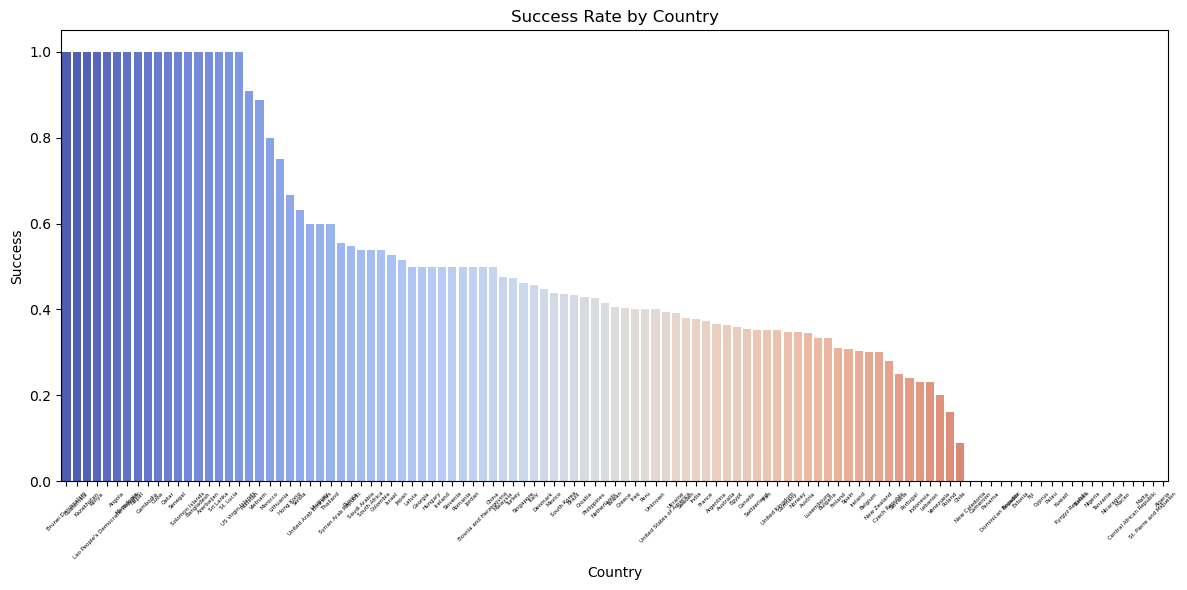

In [35]:
# Plotting the graph between genres_split and success

plot.figure(figsize=(12,6))
sns.barplot(x='country_split', y='success', data=country_success, palette='coolwarm')
plot.title('Success Rate by Country')
plot.xlabel('Country')
plot.ylabel('Success')
plot.xticks(rotation=45, fontsize=4)
plot.tight_layout()
plot.show()

### Insights:
* Countries like Brunei, Guatemala, Kazakhstan, Kenya etc. show 100% success rate.
* But this might be due to very few shows (1 or 2) from those countries, so we must be cautious interpreting that as a trend.
* Larger countries like United States of America, United Kingdom, Canada are more central but they might have lower averages due to higher volume and diversity in content.

In [36]:
# Filtering countries with less than five shows to avoid misleading 100% rates

country_counts = df_country_exploded['country_split'].value_counts()
country_counts

country_split
United States of America    3015
Japan                       1706
China                       1387
South Korea                 1162
Unknown                      915
                            ... 
Kazakhstan                     1
Kenya                          1
Central African Republic       1
Ecuador                        1
Macao                          1
Name: count, Length: 109, dtype: int64

In [37]:
valid_countries = country_counts[country_counts > 5].index
valid_countries

Index(['United States of America', 'Japan', 'China', 'South Korea', 'Unknown',
       'United Kingdom', 'Canada', 'France', 'Turkey', 'Germany', 'Mexico',
       'India', 'Spain', 'Brazil', 'Russia', 'Thailand', 'Italy', 'Australia',
       'Hong Kong', 'Philippines', 'Egypt', 'Taiwan', 'Chile', 'Netherlands',
       'Belgium', 'Poland', 'Colombia', 'Sweden', 'Denmark', 'Norway',
       'Argentina', 'Czech Republic', 'Ireland', 'Pakistan', 'Israel',
       'South Africa', 'Greece', 'Portugal', 'Finland', 'Austria', 'Ukraine',
       'Hungary', 'Romania', 'Malaysia', 'New Zealand', 'Serbia',
       'Switzerland', 'Iran', 'Slovakia', 'Bulgaria', 'Saudi Arabia',
       'Singapore', 'Lebanon', 'Indonesia', 'Venezuela', 'Morocco', 'Vietnam',
       'Syrian Arab Republic', 'Croatia', 'Iceland'],
      dtype='object', name='country_split')

In [38]:
filtered_data = country_success[country_success['country_split'].isin(valid_countries)]
filtered_data

,country_split,success
18,Pakistan,0.909091
19,Vietnam,0.888889
20,Morocco,0.800000
22,Hong Kong,0.666667
23,Serbia,0.631579
26,Thailand,0.598684
27,Syrian Arab Republic,0.555556
28,Russia,0.547170
29,Saudi Arabia,0.538462
30,South Africa,0.538462


In [39]:
filtered_data = filtered_data.sort_values(by = 'success', ascending = False)

C:\Users\Win10\AppData\Local\Temp\ipykernel_760\4073062282.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


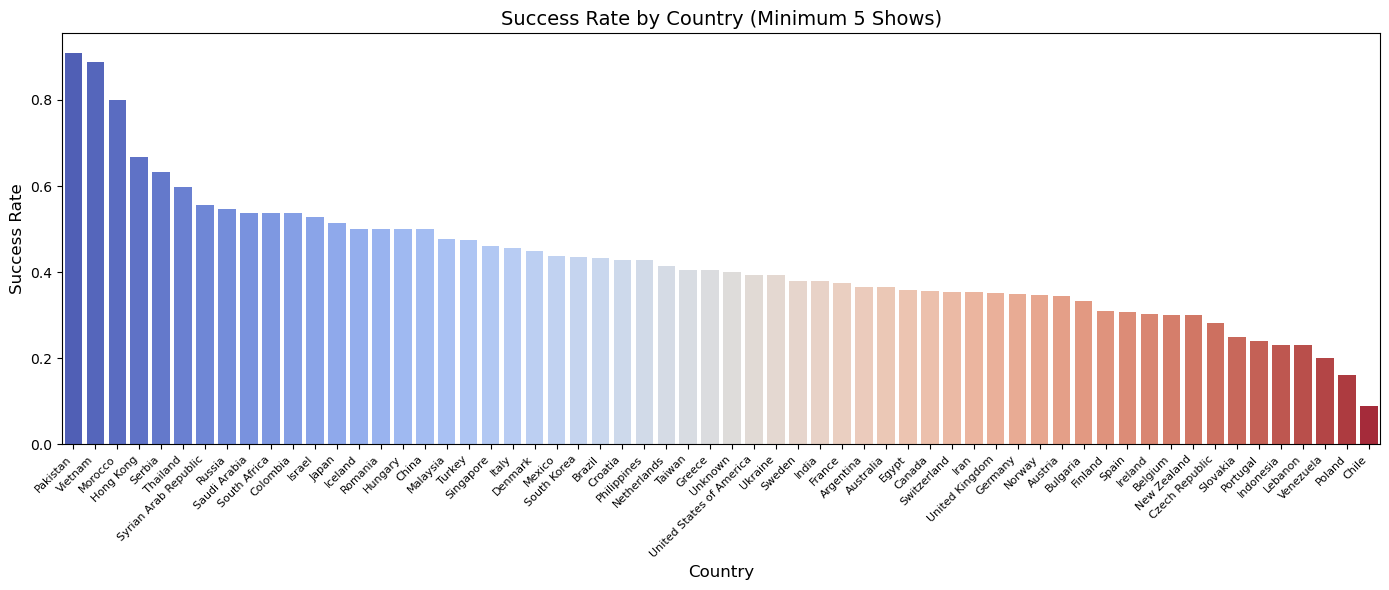

In [40]:
# Plotting the graph with filtered data

plot.figure(figsize=(14, 6))
sns.barplot(
    x='country_split',
    y='success',
    data=filtered_data,
    palette='coolwarm'
)

plot.title('Success Rate by Country (Minimum 5 Shows)', fontsize=14)
plot.xlabel('Country', fontsize=12)
plot.ylabel('Success Rate', fontsize=12)
plot.xticks(rotation=45, ha='right', fontsize=8)
plot.tight_layout()
plot.show()

### Insights:
* Countries such as Pakistan, Vietnam, and Morocco have a very high success rate, with over 90% of their shows marked as successful. Each of these countries has at least five shows in the dataset.
* On the other hand, Indonesia, Lebanon, Venezuela, Poland, and Chile have some of the lowest success rates, with Chile having the lowest at around 10%.
* By focusing only on countries with at least five shows, we get a clearer and more reliable picture of how success varies by country. This can be helpful when building our prediction model later.

C:\Users\Win10\AppData\Local\Temp\ipykernel_760\3118095231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_year', data=df, palette='viridis', order=sorted(df['release_year'].dropna().unique()))


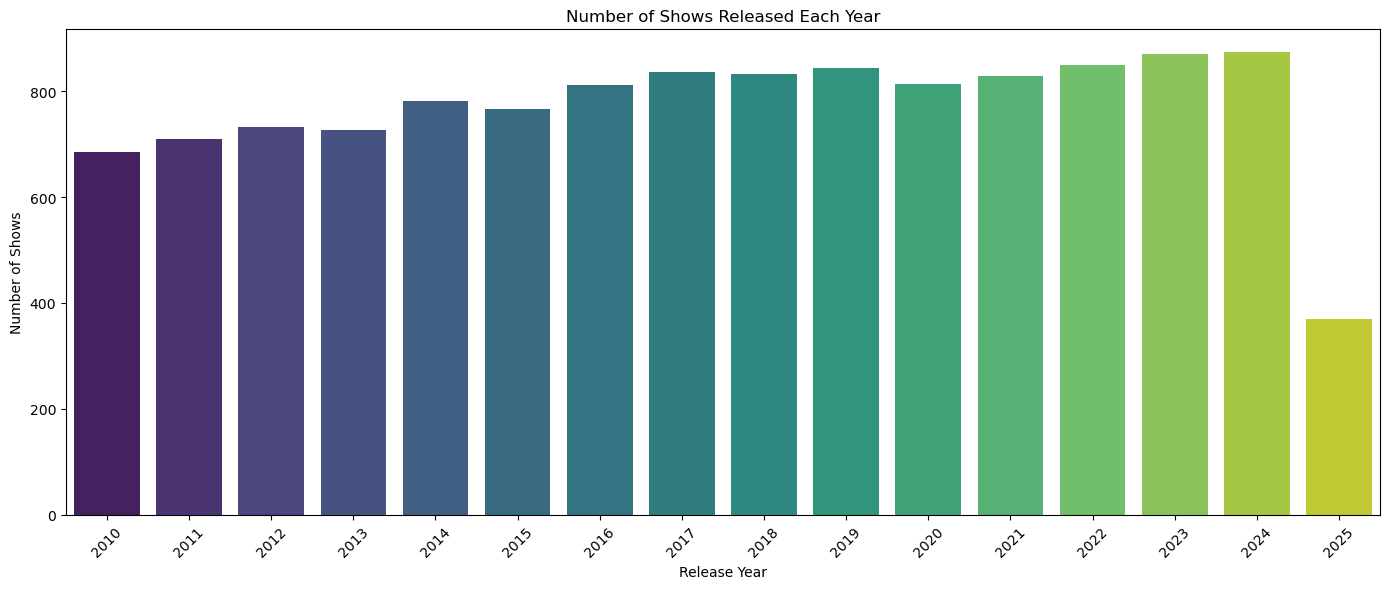

In [42]:
# Understanding distribution of the shows over years

plot.figure(figsize=(14,6))
sns.countplot(x='release_year', data=df, palette='viridis', order=sorted(df['release_year'].dropna().unique()))
plot.xticks(rotation=45)
plot.title('Number of Shows Released Each Year')
plot.xlabel('Release Year')
plot.ylabel('Number of Shows')
plot.tight_layout()
plot.show()

### Insights:
* The number of shows released peaked in 2023 and 2024, making them the most active years for content production.
* The count for 2025 is lower because the dataset only includes shows released earlier in the year.
* There's a noticeable increase in show releases after 2015, which could be linked to the wider availability of affordable internet.
* In countries like India, this trend may have been driven by the launch of services like Reliance Jio, which made internet access cheaper and boosted demand for streaming platforms like Netflix.

In [44]:
# Analyzing success rate over the years

yearly_success = df.groupby('release_year')['success'].mean().reset_index()
yearly_success

,release_year,success
0,2010,0.379562
1,2011,0.366714
2,2012,0.374317
3,2013,0.388430
4,2014,0.410486
5,2015,0.402089
6,2016,0.391626
7,2017,0.412679
8,2018,0.451923
9,2019,0.472123


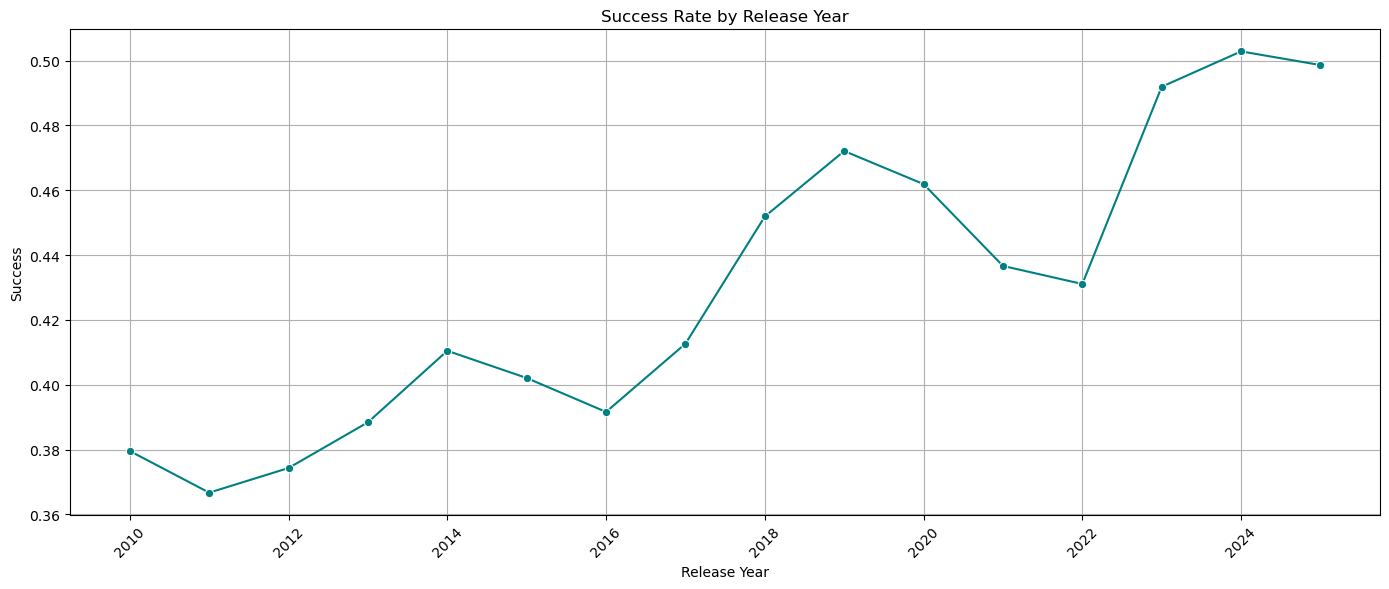

In [47]:
# Plotting the success rate over the years

plot.figure(figsize=(14,6))
sns.lineplot(data=yearly_success, x='release_year', y='success', marker='o', color='teal')
plot.title('Success Rate by Release Year')
plot.xlabel('Release Year')
plot.ylabel('Success')
plot.xticks(rotation=45)
plot.grid(True)
plot.tight_layout()
plot.show()

### Insights:
* From 2010 to 2012, the success rate stayed below 0.38, showing a slow start in performance.
* Between 2013 and 2014, success rates began to rise, crossing the 0.41 mark.
* In 2016, there was a dip, meaning shows released that year didn’t perform as well.
* Starting from 2017, there was a steady improvement in success, with 2018 and 2019 showing strong performance.
* Although there was a slight decline around 2020 and 2021, success picked up again in 2023 and 2024, reaching the highest levels above 0.5.
* The dip in 2025 is likely because the year isn’t over yet, and the data includes only early releases.

### Understanding Correlation Between the Variables

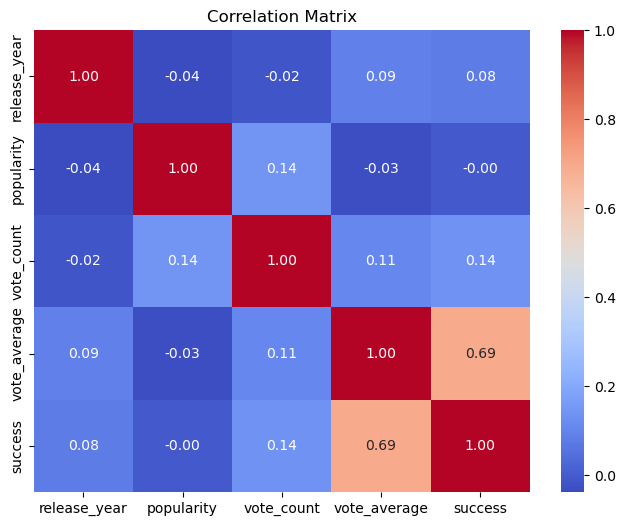

In [49]:
# Selecting only numerical columns

numeric_df = df[['release_year', 'popularity', 'vote_count', 'vote_average', 'success']]

correlation_matrix = numeric_df.corr()

plot.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plot.title('Correlation Matrix')
plot.show()

### Insights:
* `vote_average` shows strong positive correlation — as the average rating increases, the show is more likely to be marked successful. This makes sense, and this feature will be very useful in modeling.
* `vote_count` shows weak positive correlation — shows with more votes tend to be slightly more successful, but the relationship is not strong. Still, could be helpful in combination with other features.
* `release_year` shows very weak positive — newer shows might be slightly more successful, but not enough to rely on this feature alone.
* `popularity` shows no correlation — popularity score doesn’t relate directly to success (surprising, but possible due to Netflix's algorithm or dataset nature).

## 3. Encoding of Genres & Country Columns

In [50]:
# Adding an identifier to our original dataframe

df = df.reset_index(drop=True)
df['show_id'] = df.index
df

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,country_split,show_id
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,"[Comedy, Reality]",[South Korea],0
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,"[Talk, Comedy, News]",[United States of America],1
2,Greece,2010,Reality,el,1317.092,6,5.600,0,Other,[Reality],[Greece],2
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0,Other,[Reality],[Czech Republic],3
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk],"[United States of America, Ireland]",4
...,...,...,...,...,...,...,...,...,...,...,...,...
12322,Denmark,2025,"Documentary, Reality",da,4.624,1,10.000,1,Other,"[Documentary, Reality]",[Denmark],12322
12323,Unknown,2025,"Comedy, Family",it,3.361,1,10.000,1,Other,"[Comedy, Family]",[Unknown],12323
12324,China,2025,"Drama, Sci-Fi & Fantasy",zh,5.286,1,6.000,0,zh,"[Drama, Sci-Fi & Fantasy]",[China],12324
12325,Sweden,2025,Documentary,sv,2.418,1,5.000,0,Other,[Documentary],[Sweden],12325


In [51]:
# Adding the same show_id to df_genre_exploded

df_genre_exploded['show_id'] = df_genre_exploded.index
df_genre_exploded

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,show_id
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,Comedy,0
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,Reality,0
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,Talk,1
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,Comedy,1
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,News,1
...,...,...,...,...,...,...,...,...,...,...,...
15986,Unknown,2025,"Comedy, Family",it,3.361,1,10.000,1,Other,Family,15986
15987,China,2025,"Drama, Sci-Fi & Fantasy",zh,5.286,1,6.000,0,zh,Drama,15987
15987,China,2025,"Drama, Sci-Fi & Fantasy",zh,5.286,1,6.000,0,zh,Sci-Fi & Fantasy,15987
15993,Sweden,2025,Documentary,sv,2.418,1,5.000,0,Other,Documentary,15993


In [53]:
# One hot encode genres_split in df_genre_exploded

genre_dummies = pd.get_dummies(df_genre_exploded['genres_split'], prefix='genre', dtype=int)
genre_dummies

,genre_Action & Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Kids,genre_Mystery,genre_News,genre_Reality,genre_Sci-Fi & Fantasy,genre_Soap,genre_Talk,genre_Unknown,genre_War & Politics,genre_Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15986,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
15987,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15987,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
15993,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# Adding show_id back to genre_dummies

genre_dummies['show_id'] = df_genre_exploded['show_id']
genre_dummies

,genre_Action & Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Kids,genre_Mystery,genre_News,genre_Reality,genre_Sci-Fi & Fantasy,genre_Soap,genre_Talk,genre_Unknown,genre_War & Politics,genre_Western,show_id
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15986,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15986
15987,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,15987
15987,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15987
15993,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,15993


In [56]:
# Group by show_id and aggregate since one show can belong to multiple genres

genre_encoded = genre_dummies.groupby('show_id').max().reset_index()
genre_encoded

,show_id,genre_Action & Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Kids,genre_Mystery,genre_News,genre_Reality,genre_Sci-Fi & Fantasy,genre_Soap,genre_Talk,genre_Unknown,genre_War & Politics,genre_Western
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12322,15974,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
12323,15986,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12324,15987,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
12325,15993,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# Merge with main df using show_id

df_encoded = df.merge(genre_encoded, on='show_id', how='left')
df_encoded

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,...,genre_Kids,genre_Mystery,genre_News,genre_Reality,genre_Sci-Fi & Fantasy,genre_Soap,genre_Talk,genre_Unknown,genre_War & Politics,genre_Western
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,"[Comedy, Reality]",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,"[Talk, Comedy, News]",...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Greece,2010,Reality,el,1317.092,6,5.600,0,Other,[Reality],...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0,Other,[Reality],...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk],...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12322,Denmark,2025,"Documentary, Reality",da,4.624,1,10.000,1,Other,"[Documentary, Reality]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12323,Unknown,2025,"Comedy, Family",it,3.361,1,10.000,1,Other,"[Comedy, Family]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12324,China,2025,"Drama, Sci-Fi & Fantasy",zh,5.286,1,6.000,0,zh,"[Drama, Sci-Fi & Fantasy]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12325,Sweden,2025,Documentary,sv,2.418,1,5.000,0,Other,[Documentary],...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df_encoded.columns[df_encoded.columns.str.startswith('genre_')]


Index(['genre_Action & Adventure', 'genre_Animation', 'genre_Comedy',
       'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family',
       'genre_Kids', 'genre_Mystery', 'genre_News', 'genre_Reality',
       'genre_Sci-Fi & Fantasy', 'genre_Soap', 'genre_Talk', 'genre_Unknown',
       'genre_War & Politics', 'genre_Western'],
      dtype='object')

In [60]:
df[df['show_id'] == 140]  # original row

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,country_split,show_id
140,Colombia,2010,"Action & Adventure, Crime, Drama",es,82.107,1062,7.32,0,es,"[Action & Adventure, Crime, Drama]",[Colombia],140


In [61]:
df_encoded[df_encoded['show_id'] == 140]  # with genre flags

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,...,genre_Kids,genre_Mystery,genre_News,genre_Reality,genre_Sci-Fi & Fantasy,genre_Soap,genre_Talk,genre_Unknown,genre_War & Politics,genre_Western
140,Colombia,2010,"Action & Adventure, Crime, Drama",es,82.107,1062,7.32,0,es,"[Action & Adventure, Crime, Drama]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# 1. Get the encoded genre columns (they usually start with 'genre_')
genre_cols = [col for col in df_encoded.columns if col.startswith('genre_')]

# 2. Filter the row with show_id = 140 and select only genre columns
df_encoded.loc[df_encoded['show_id'] == 140, genre_cols]

,genre_Action & Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Kids,genre_Mystery,genre_News,genre_Reality,genre_Sci-Fi & Fantasy,genre_Soap,genre_Talk,genre_Unknown,genre_War & Politics,genre_Western
140,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df_genre_exploded[df_genre_exploded['show_id'] == 140][['show_id', 'genres_split']]

,show_id,genres_split
140,140,Drama


### Insights:
* df_genre_exploded for show_id = 140 contains only 'Drama', but it should include multiple genres if the original row had more than one (e.g., "Action & Adventure, Crime, Drama").
* One of the reasons might be that the genre splitting before cleaning whitespace, or the splitting didn’t properly handle multiple genres due to inconsistent delimiters or formatting.
* Performing the split and encoding steps again

In [78]:
df['genres_split'] = df['genres'].str.split(',').apply(lambda x: [genre.strip() for genre in x])

In [79]:
df_genre_exploded = df.explode('genres_split').reset_index(drop=True)

In [80]:
df_genre_exploded[df_genre_exploded['show_id'] == 140][['show_id', 'genres_split']]

,show_id,genres_split
279,140,Action & Adventure
280,140,Crime
281,140,Drama


In [82]:
genre_encoded = pd.get_dummies(df_genre_exploded['genres_split'], prefix='genre', dtype=int)
df_genre_encoded = pd.concat([df_genre_exploded[['show_id']], genre_encoded], axis=1)
df_genre_encoded = df_genre_encoded.groupby('show_id').max().reset_index()

In [83]:
df_encoded = df.merge(df_genre_encoded, on='show_id', how='left')
df_encoded

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,...,genre_Kids,genre_Mystery,genre_News,genre_Reality,genre_Sci-Fi & Fantasy,genre_Soap,genre_Talk,genre_Unknown,genre_War & Politics,genre_Western
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,"[Comedy, Reality]",...,0,0,0,1,0,0,0,0,0,0
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,"[Talk, Comedy, News]",...,0,0,1,0,0,0,1,0,0,0
2,Greece,2010,Reality,el,1317.092,6,5.600,0,Other,[Reality],...,0,0,0,1,0,0,0,0,0,0
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0,Other,[Reality],...,0,0,0,1,0,0,0,0,0,0
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk],...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12322,Denmark,2025,"Documentary, Reality",da,4.624,1,10.000,1,Other,"[Documentary, Reality]",...,0,0,0,1,0,0,0,0,0,0
12323,Unknown,2025,"Comedy, Family",it,3.361,1,10.000,1,Other,"[Comedy, Family]",...,0,0,0,0,0,0,0,0,0,0
12324,China,2025,"Drama, Sci-Fi & Fantasy",zh,5.286,1,6.000,0,zh,"[Drama, Sci-Fi & Fantasy]",...,0,0,0,0,1,0,0,0,0,0
12325,Sweden,2025,Documentary,sv,2.418,1,5.000,0,Other,[Documentary],...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_encoded.loc[df_encoded['show_id'] == 140, [col for col in df_encoded.columns if col.startswith('genre_')]]


,genre_Action & Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Kids,genre_Mystery,genre_News,genre_Reality,genre_Sci-Fi & Fantasy,genre_Soap,genre_Talk,genre_Unknown,genre_War & Politics,genre_Western
140,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Repeating the same process for Country encoding

In [109]:
df['country_split'] = df['country'].str.split(',').apply(lambda x: [c.strip() for c in x] if isinstance(x, list) else [])

In [112]:
df_country_exploded = df.explode('country_split').reset_index(drop=True)
df_country_exploded.head(10)

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,country_split,show_id
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,"[Comedy, Reality]",South Korea,0
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,"[Talk, Comedy, News]",United States of America,1
2,Greece,2010,Reality,el,1317.092,6,5.600,0,Other,[Reality],Greece,2
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0,Other,[Reality],Czech Republic,3
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk],United States of America,4
5,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk],Ireland,4
6,"United States of America, Singapore",2010,"Crime, Drama, Action & Adventure",en,616.862,1750,7.800,1,en,"[Crime, Drama, Action & Adventure]",United States of America,5
7,"United States of America, Singapore",2010,"Crime, Drama, Action & Adventure",en,616.862,1750,7.800,1,en,"[Crime, Drama, Action & Adventure]",Singapore,5
8,United States of America,2010,"Action & Adventure, Drama, Sci-Fi & Fantasy",en,485.660,16790,8.103,1,en,"[Action & Adventure, Drama, Sci-Fi & Fantasy]",United States of America,6
9,United States of America,2010,"Animation, Comedy",en,426.107,2045,8.621,1,en,"[Animation, Comedy]",United States of America,7


In [113]:
country_encoded = pd.get_dummies(df_country_exploded['country_split'], prefix='country', dtype=int)
df_country_encoded = pd.concat([df_country_exploded[['show_id']], country_encoded], axis=1)
df_country_encoded.head(10)

,show_id,country_Algeria,country_Angola,country_Argentina,country_Australia,country_Austria,country_Azerbaijan,country_Bangladesh,country_Belgium,country_Bosnia and Herzegovina,...,country_Turkey,country_US Virgin Islands,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,country_Unknown,country_Uruguay,country_Venezuela,country_Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [114]:
df_country_encoded = df_country_encoded.groupby('show_id').max().reset_index()

In [117]:
df_encoded.head(10)

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,...,country_Turkey,country_US Virgin Islands,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,country_Unknown,country_Uruguay,country_Venezuela,country_Vietnam
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,"[Comedy, Reality]",...,0,0,0,0,0,0,0,0,0,0
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,"[Talk, Comedy, News]",...,0,0,0,0,0,1,0,0,0,0
2,Greece,2010,Reality,el,1317.092,6,5.600,0,Other,[Reality],...,0,0,0,0,0,0,0,0,0,0
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0,Other,[Reality],...,0,0,0,0,0,0,0,0,0,0
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk],...,0,0,0,0,0,1,0,0,0,0
5,"United States of America, Singapore",2010,"Crime, Drama, Action & Adventure",en,616.862,1750,7.800,1,en,"[Crime, Drama, Action & Adventure]",...,0,0,0,0,0,1,0,0,0,0
6,United States of America,2010,"Action & Adventure, Drama, Sci-Fi & Fantasy",en,485.660,16790,8.103,1,en,"[Action & Adventure, Drama, Sci-Fi & Fantasy]",...,0,0,0,0,0,1,0,0,0,0
7,United States of America,2010,"Animation, Comedy",en,426.107,2045,8.621,1,en,"[Animation, Comedy]",...,0,0,0,0,0,1,0,0,0,0
8,United Kingdom,2010,Documentary,en,581.634,8,5.000,0,en,[Documentary],...,0,0,0,0,1,0,0,0,0,0
9,Canada,2010,"Family, Talk",fr,413.464,12,2.900,0,fr,"[Family, Talk]",...,0,0,0,0,0,0,0,0,0,0


In [122]:
# Drop existing one-hot country columns from df_encoded (if any)
country_cols = [col for col in df_encoded.columns if col.startswith('country_')]
df_encoded = df_encoded.drop(columns=country_cols)

# Merge fresh one-hot encoded countries
df_encoded = pd.merge(df_encoded, df_country_encoded, on='show_id', how='left')

In [123]:
df_encoded.head(10)

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,...,country_Turkey,country_US Virgin Islands,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,country_Unknown,country_Uruguay,country_Venezuela,country_Vietnam
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,"[Comedy, Reality]",...,0,0,0,0,0,0,0,0,0,0
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,"[Talk, Comedy, News]",...,0,0,0,0,0,1,0,0,0,0
2,Greece,2010,Reality,el,1317.092,6,5.600,0,Other,[Reality],...,0,0,0,0,0,0,0,0,0,0
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0,Other,[Reality],...,0,0,0,0,0,0,0,0,0,0
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk],...,0,0,0,0,0,1,0,0,0,0
5,"United States of America, Singapore",2010,"Crime, Drama, Action & Adventure",en,616.862,1750,7.800,1,en,"[Crime, Drama, Action & Adventure]",...,0,0,0,0,0,1,0,0,0,0
6,United States of America,2010,"Action & Adventure, Drama, Sci-Fi & Fantasy",en,485.660,16790,8.103,1,en,"[Action & Adventure, Drama, Sci-Fi & Fantasy]",...,0,0,0,0,0,1,0,0,0,0
7,United States of America,2010,"Animation, Comedy",en,426.107,2045,8.621,1,en,"[Animation, Comedy]",...,0,0,0,0,0,1,0,0,0,0
8,United Kingdom,2010,Documentary,en,581.634,8,5.000,0,en,[Documentary],...,0,0,0,0,1,0,0,0,0,0
9,Canada,2010,"Family, Talk",fr,413.464,12,2.900,0,fr,"[Family, Talk]",...,0,0,0,0,0,0,0,0,0,0


In [125]:
df_encoded[df_encoded['show_id'] == 4].filter(like='country_')


,country_Algeria,country_Angola,country_Argentina,country_Australia,country_Austria,country_Azerbaijan,country_Bangladesh,country_Belgium,country_Bosnia and Herzegovina,country_Brazil,...,country_Turkey,country_US Virgin Islands,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,country_Unknown,country_Uruguay,country_Venezuela,country_Vietnam
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [130]:
df_encoded.loc[df_encoded['show_id'] == 12, ['genre_Drama', 'genre_Mystery']]


,genre_Drama,genre_Mystery
12,1,1


In [127]:
# Verifying hot-encoding by sampling

sample_id = 12  # replace with a few others

print("Original genres:", df[df['show_id'] == sample_id]['genres'].values[0])
df_encoded.loc[df_encoded['show_id'] == sample_id].filter(like='genre_').loc[:, lambda x: x.eq(1).any()]

Original genres: Drama, Mystery


,genre_Drama,genre_Mystery
12,1,1


In [128]:
print("Original country:", df[df['show_id'] == sample_id]['country'].values[0])
df_encoded.loc[df_encoded['show_id'] == sample_id].filter(like='country_').loc[:, lambda x: x.eq(1).any()]

Original country: United States of America


,country_United States of America
12,1


In [132]:
# Verifying hot-encoding by sampling

sample_id = 5  # replace with a few others

print("Original genres:", df[df['show_id'] == sample_id]['genres'].values[0])
df_encoded.loc[df_encoded['show_id'] == sample_id].filter(like='genre_').loc[:, lambda x: x.eq(1).any()]

Original genres: Crime, Drama, Action & Adventure


,genre_Action & Adventure,genre_Crime,genre_Drama
5,1,1,1


In [133]:
print("Original country:", df[df['show_id'] == sample_id]['country'].values[0])
df_encoded.loc[df_encoded['show_id'] == sample_id].filter(like='country_').loc[:, lambda x: x.eq(1).any()]

Original country: United States of America, Singapore


,country_Singapore,country_United States of America
5,1,1


In [135]:
# Verifying hot-encoding by sampling

sample_id = 13  # replace with a few others

print("Original genres:", df[df['show_id'] == sample_id]['genres'].values[0])
df_encoded.loc[df_encoded['show_id'] == sample_id].filter(like='genre_').loc[:, lambda x: x.eq(1).any()]

Original genres: Crime, Drama


,genre_Crime,genre_Drama
13,1,1


In [136]:
print("Original country:", df[df['show_id'] == sample_id]['country'].values[0])
df_encoded.loc[df_encoded['show_id'] == sample_id].filter(like='country_').loc[:, lambda x: x.eq(1).any()]

Original country: United States of America, United Kingdom


,country_United Kingdom,country_United States of America
13,1,1


In [138]:
# Check if hot-encoding added nulls or errors

genre_cols = [col for col in df_encoded.columns if col.startswith('genre_')]
country_cols = [col for col in df_encoded.columns if col.startswith('country_')]

print("Any nulls in genre columns?", df_encoded[genre_cols].isnull().any().any())
print("Any nulls in country columns?", df_encoded[country_cols].isnull().any().any())

# Optional: check value ranges
print("Genre column unique values:", df_encoded[genre_cols].stack().unique())
print("Country column unique values:", df_encoded[country_cols].stack().unique())

Any nulls in genre columns? False
Any nulls in country columns? False
Genre column unique values: [0 1]
Country column unique values: [0 1]


### Insights:
* After verifying successfully, we found that all the variables have been encoded properly and one-hot encoding didn't add any nulls or errors.
* Post verification, we are proceeding with dropping of unnecessary columns `genres`, `country`, `genres_split`.

In [140]:
df_encoded.drop(['genres', 'country', 'genres_split'], axis=1, inplace=True)
df_encoded.head(15)

,release_year,language,popularity,vote_count,vote_average,success,language_grouped,show_id,genre_Action & Adventure,genre_Animation,...,country_Turkey,country_US Virgin Islands,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,country_Unknown,country_Uruguay,country_Venezuela,country_Vietnam
0,2010,ko,1929.898,187,8.241,1,ko,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,en,1670.580,229,7.035,0,en,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2010,el,1317.092,6,5.600,0,Other,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,cs,1095.776,6,6.500,0,Other,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,en,712.070,12,3.400,0,en,4,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2010,en,616.862,1750,7.800,1,en,5,1,0,...,0,0,0,0,0,1,0,0,0,0
6,2010,en,485.660,16790,8.103,1,en,6,1,0,...,0,0,0,0,0,1,0,0,0,0
7,2010,en,426.107,2045,8.621,1,en,7,0,1,...,0,0,0,0,0,1,0,0,0,0
8,2010,en,581.634,8,5.000,0,en,8,0,0,...,0,0,0,0,1,0,0,0,0,0
9,2010,fr,413.464,12,2.900,0,fr,9,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
print("Unique values in language:", df_encoded['language'].nunique())
print("Unique values in language_grouped:", df_encoded['language_grouped'].nunique())

Unique values in language: 64
Unique values in language_grouped: 11


In [142]:
df_encoded[['language', 'language_grouped']].sample(10)

,language,language_grouped
5722,en,en
1230,ru,Other
9731,ru,Other
9223,en,en
1153,en,en
817,ko,ko
11975,ko,ko
942,en,en
2965,en,en
7713,ru,Other


In [143]:
# Dropping language column as language_grouped is an aggregated version of language
# Retaining only language_grouped for encoding and modeling

df_encoded.drop('language', axis=1, inplace=True)

In [144]:
df_encoded = pd.get_dummies(df_encoded, columns=['language_grouped'], prefix='lang', dtype=int)

In [145]:
df_encoded.filter(like='lang_').head(10)

,lang_Other,lang_de,lang_en,lang_es,lang_fr,lang_hi,lang_ja,lang_ko,lang_pt,lang_tr,lang_zh
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0


In [146]:
df_encoded[df_encoded['show_id'] == 100].filter(like='lang_')

,lang_Other,lang_de,lang_en,lang_es,lang_fr,lang_hi,lang_ja,lang_ko,lang_pt,lang_tr,lang_zh
100,0,0,1,0,0,0,0,0,0,0,0


## 4. Model Building
* Proceeding with modeling using cleaned and encoded dataset
* We are using Decision Tree Classifier

In [148]:
# Defining target variable
y = df_encoded['success']

# Dropping target and show_id to get predicted features only
X = df_encoded.drop(['success', 'show_id'], axis=1)

In [150]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# We are stratifying to preserve the success distribution
# Using 80% of the data into training set and remaining 20% into testing set

In [153]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (9861, 141)
X_test: (2466, 141)
y_train: (9861,)
y_test: (2466,)


In [155]:
# Fitting the decision tree model

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [157]:
# Evaluating the model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00      1060

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466



In [159]:
print('Decision Tree')
print('Accuracy:', '%.6f'% metrics.accuracy_score(y_test, y_pred))
print('Precision:', '%.6f'% metrics.precision_score(y_test, y_pred))
print('Recall:', '%.6f'% metrics.recall_score(y_test, y_pred))
print('F1 Score:', '%.6f'% metrics.f1_score(y_test, y_pred))

Decision Tree
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 Score: 1.000000


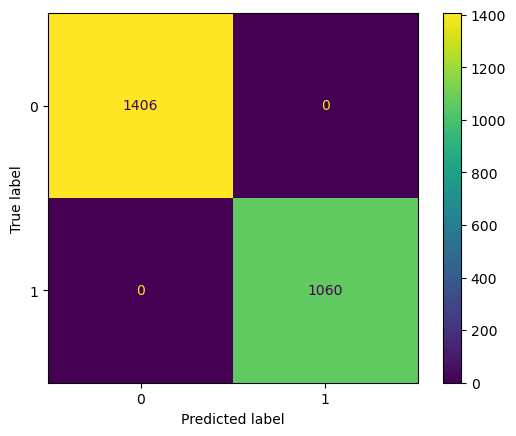

In [158]:
# Producing confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = decision_tree.classes_)
disp.plot()

In [160]:
X.columns

Index(['release_year', 'popularity', 'vote_count', 'vote_average',
       'genre_Action & Adventure', 'genre_Animation', 'genre_Comedy',
       'genre_Crime', 'genre_Documentary', 'genre_Drama',
       ...
       'lang_de', 'lang_en', 'lang_es', 'lang_fr', 'lang_hi', 'lang_ja',
       'lang_ko', 'lang_pt', 'lang_tr', 'lang_zh'],
      dtype='object', length=141)

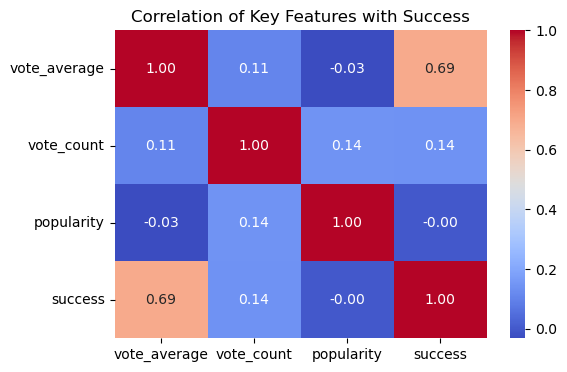

In [162]:
key_features = ['vote_average', 'vote_count', 'popularity', 'success']

# Compute correlation matrix
corr = df_encoded[key_features].corr()

# Visualize correlation
import seaborn as sns
import matplotlib.pyplot as plt

plot.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plot.title('Correlation of Key Features with Success')
plot.show()

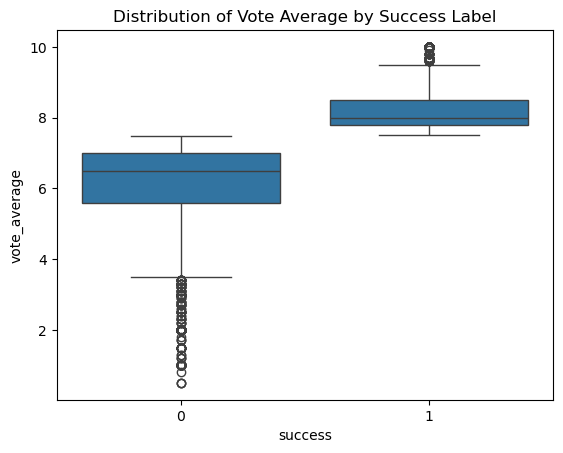

In [163]:
sns.boxplot(x='success', y='vote_average', data=df_encoded)
plot.title("Distribution of Vote Average by Success Label")
plot.show()

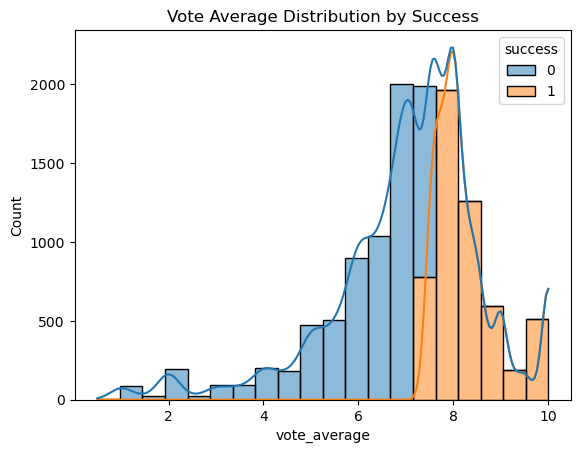

In [164]:
sns.histplot(data=df_encoded, x='vote_average', hue='success', bins=20, kde=True, multiple="stack")
plot.title("Vote Average Distribution by Success")
plot.show()

### Insights:
**Model Re-Evaluation without vote_average Feature**
* In the initial model, the target variable `success` was derived solely based on the `rating` feature (which we later dropped), and `vote_average` was not part of that original logic.
* However, during feature correlation analysis, we observed a strong correlation (0.69) between `vote_average` and `success`, which likely resulted in an artificially high model performance, including perfect accuracy.
* To ensure a fair and unbiased evaluation, we are now removing `vote_average` from the feature set before retraining the model.
* This step helps us to prevent data leakage, evaluate the model's ability to generalize using other independent features and better understand the role of different attributes in predicting success.
* We will now retrain the Decision Tree classifier without the `vote_average` column and assess performance metrics accordingly.

In [165]:
# Retraining the model without `vote_average`

X = df_encoded.drop('vote_average', axis=1)

In [166]:
# Re-splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Using 70% of the data into training set and remaining 30% into testing set

In [168]:
# Retraining the decision tree model

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [169]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


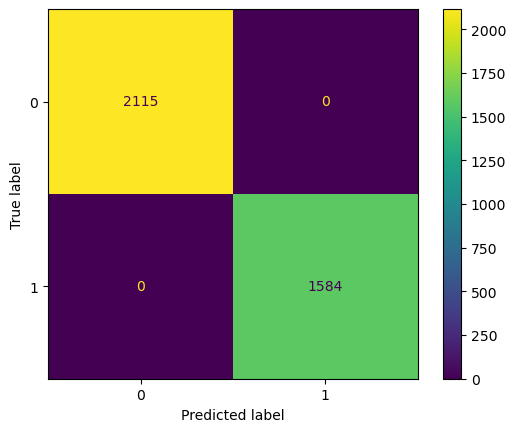

In [171]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot()

### Insights:
**Model Validation Strategy: Addressing Overfitting and Unrealistic Accuracy**
* After observing a perfect 100% accuracy across all evaluation metrics using the Decision Tree classifier, we recognized a high likelihood of overfitting or hidden data leakage — despite having removed the `vote_average` column, which was used to derive the success label.
* To ensure the integrity and credibility of this portfolio project, we will implement the following corrective actions:
  1. Introduce regularization to the Decision Tree model, including max_depth and min_samples_split, to limit overfitting and encourage generalization.
  2. Reassess one-hot encoded features, especially those with high granularity (e.g., many binary columns for genres or countries), to avoid data fragmentation that could artificially inflate performance.

In [173]:
# Calculate success rate per genre
genre_success_rate = df_genre_exploded.groupby('genres_split')['success'].mean().sort_values(ascending=False)

# Optional: also check count of occurrences
genre_counts = df_genre_exploded['genres_split'].value_counts()

# Combine into a dataframe
genre_summary = pd.DataFrame({
    'Success Rate': genre_success_rate,
    'Count': genre_counts
})

display(genre_summary)


,Success Rate,Count
genres_split,,
Action & Adventure,0.523678,1816
Animation,0.511464,2268
Comedy,0.428025,3925
Crime,0.445038,1310
Documentary,0.504673,642
Drama,0.438343,6374
Family,0.434102,1214
Kids,0.480826,678
Mystery,0.458961,1194


### Insights:
* No genre has an extremely high success rate (e.g., >0.8), which means no major data leakage via genres.
* Genre counts are well-distributed — Drama, Comedy, Animation dominate in volume.
* Some rare genres like Western (n=26) may not generalize well.

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
# Regularizing the decision tree

model = DecisionTreeClassifier(
    max_depth=5,              # prevent too deep trees
    min_samples_split=10,     # require more samples to split
    min_samples_leaf=5,       # prevent splitting small leaves
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Why Regularization is Necessary
* Initially, our Decision Tree classifier achieved perfect accuracy. While this might seem ideal, such results are typically a red flag in real-world datasets and indicate overfitting.
* Instead of simplifying the features (like grouping genres), we first applied regularization techniques to the Decision Tree model. This helps control its complexity and forces the model to learn general patterns rather than memorizing the training data.
* By setting parameters like max_depth, min_samples_split, and min_samples_leaf, we aim to improve generalization and reduce the risk of overfitting.

In [180]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


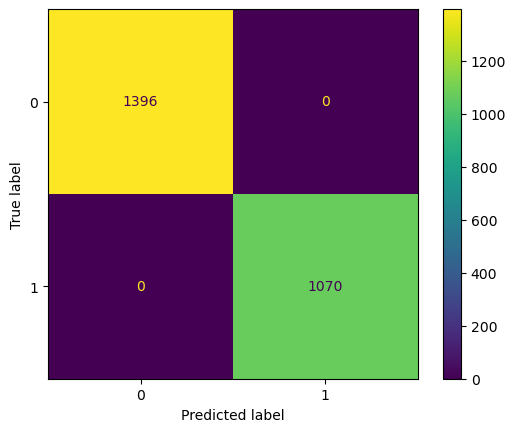

In [181]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [182]:
importances = model.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(features.head(10))

success                1.0
release_year           0.0
country_Qatar          0.0
country_Palau          0.0
country_Panama         0.0
country_Peru           0.0
country_Philippines    0.0
country_Poland         0.0
country_Portugal       0.0
country_Romania        0.0
dtype: float64


In [193]:
X = df_encoded.drop(['vote_average', 'show_id', 'success'], axis=1)

In [194]:
y = df_encoded['success']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
X.columns

Index(['release_year', 'popularity', 'vote_count', 'genre_Action & Adventure',
       'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Documentary',
       'genre_Drama', 'genre_Family',
       ...
       'lang_de', 'lang_en', 'lang_es', 'lang_fr', 'lang_hi', 'lang_ja',
       'lang_ko', 'lang_pt', 'lang_tr', 'lang_zh'],
      dtype='object', length=140)

In [197]:
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [198]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))

Accuracy: 0.6366585563665855
Precision: 0.7377049180327869
Recall: 0.2523364485981308
F1 Score: 0.37604456824512533


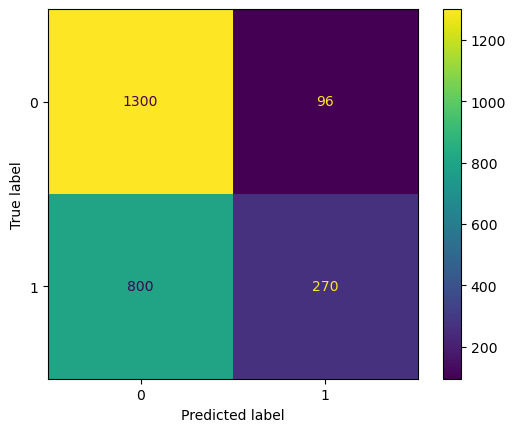

In [199]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

### Insights:
**Model Evaluation (v2): Interpreting Realistic Performance**
* After addressing potential data leakage and overfitting, we retrained our Decision Tree classifier using a more realistic feature set and introduced regularization (max_depth, min_samples_split). This version of the model yielded more trustworthy and industry-aligned performance metrics:
  1. **Accuracy:** 63.7%
  2. **Precision:** 73.8%
  3. **Recall:** 25.2%
  4. **F1 Score:** 37.6%
* These results show that while the model is quite precise in predicting success, it fails to recall a significant number of truly successful shows, leading to a low F1 score.
* **Confusion Matrix**
* 1. **True Negatives (TN):** 1300 — Correctly identified failures
  2. **False Positives (FP):** 96 — Incorrectly predicted success
  3. **False Negatives (FN):** 800 — Missed actual successful shows
  4. **True Positives (TP):** 270 — Correctly identified successes
* The model is strong in identifying failures, but its ability to detect successful shows is weak — a concern in business settings where identifying success is crucial.
* These results indicate possible underfitting, weak predictive features, or class overlap, where shows with similar characteristics have both successful and unsuccessful outcomes.

* Next, we will try to test with more robust models like Random Forest or Gradient Boosting to capture complex patterns.
* Reintroduce important features (e.g., vote_average) cautiously, only after verifying they don’t introduce data leakage.

<Axes: title={'center': 'Feature Importance (Threshold > 0.01)'}>

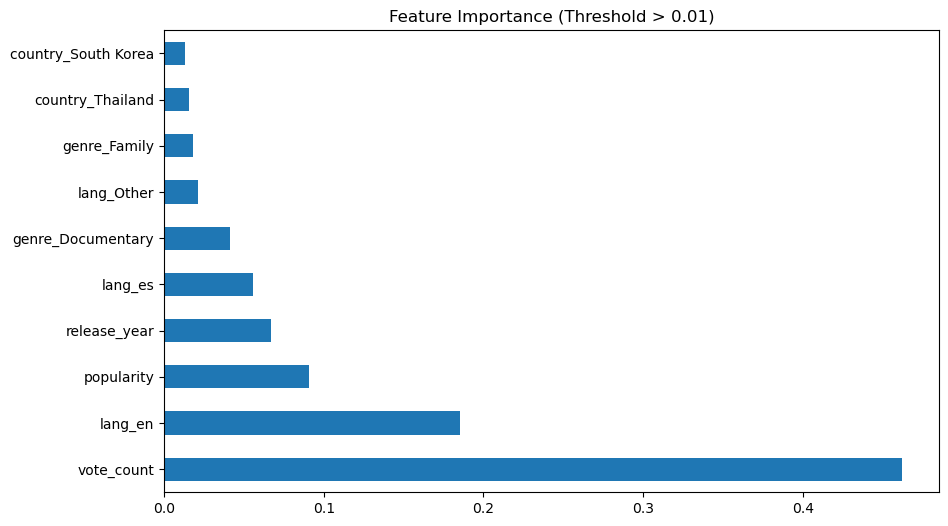

In [203]:
# Capturing important features

model = DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.01].sort_values(ascending=False)
important_features.plot(kind='barh', figsize=(10, 6), title='Feature Importance (Threshold > 0.01)')

### Evaluating the Impact of `vote_average` on Model Performance

The feature `vote_average` was not used in creating the `success` label. However, earlier analysis showed a relatively strong correlation between `vote_average` and `success`.

To ensure a robust and industry-relevant modeling strategy, we decided to train and evaluate two versions of the Random Forest model:

1. **Model A (with `vote_average`)**: This version includes `vote_average` to maximize predictive accuracy, especially since it's a strong numerical feature.

2. **Model B (without `vote_average`)**: This version excludes `vote_average` to simulate a more realistic deployment scenario — where average ratings may not be available for newer or unreleased shows.

By comparing both models, we aim to:
- Identify the trade-off between accuracy and generalizability.
- Validate whether `vote_average` causes any unintended model bias.
- Showcase our critical thinking and modeling decisions in real-world contexts.

In [208]:
# Defining important features
base_features = [
    'vote_count', 'popularity', 'release_year', 
    'lang_en', 'lang_es', 'lang_Other',
    'genre_Documentary', 'genre_Family',
    'country_Thailand', 'country_South Korea'
]

# Model A: With vote_average
features_with_vote_avg = base_features + ['vote_average']

# Model B: Without vote_average
features_without_vote_avg = base_features

In [209]:
# Train/test split and model training

# Define target
y = df_encoded['success']

# Model A
X_a = df_encoded[features_with_vote_avg]
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y, test_size=0.2, random_state=42)

model_a = RandomForestClassifier(random_state=42)
model_a.fit(X_train_a, y_train_a)
y_pred_a = model_a.predict(X_test_a)

# Model B
X_b = df_encoded[features_without_vote_avg]
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y, test_size=0.2, random_state=42)

model_b = RandomForestClassifier(random_state=42)
model_b.fit(X_train_b, y_train_b)
y_pred_b = model_b.predict(X_test_b)

In [211]:
# Evaluating both the model

def evaluate_model(y_test, y_pred, model_name):
    print(f"📊 Results for {model_name}")
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1 Score:", metrics.f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print("True Negatives:", cm[0][0])
    print("False Positives:", cm[0][1])
    print("False Negatives:", cm[1][0])
    print("True Positives:", cm[1][1])
    print("-" * 40)

evaluate_model(y_test_a, y_pred_a, "Model A (with vote_average)")
evaluate_model(y_test_b, y_pred_b, "Model B (without vote_average)")


📊 Results for Model A (with vote_average)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
True Negatives: 1396
False Positives: 0
False Negatives: 0
True Positives: 1070
----------------------------------------
📊 Results for Model B (without vote_average)
Accuracy: 0.6188158961881589
Precision: 0.5703463203463204
Recall: 0.49252336448598133
F1 Score: 0.5285857572718154
Confusion Matrix:
True Negatives: 999
False Positives: 397
False Negatives: 543
True Positives: 527
----------------------------------------


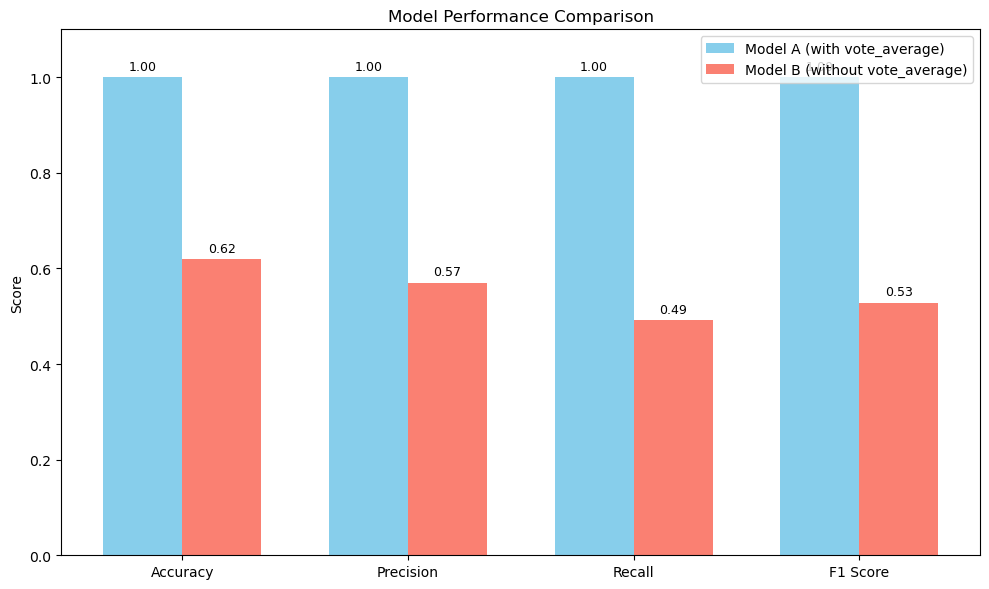

In [229]:
# Plotting the metrics for both the models

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Values for Model A (with vote_average)
model_a = [1.0, 1.0, 1.0, 1.0]

# Values for Model B (without vote_average)
model_b = [0.6188, 0.5703, 0.4925, 0.5286]

# Set up positions for the bars
x = np.arange(len(metrics))
width = 0.35  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars_a = ax.bar(x - width/2, model_a, width, label='Model A (with vote_average)', color='skyblue')
bars_b = ax.bar(x + width/2, model_b, width, label='Model B (without vote_average)', color='salmon')

# Add labels and title
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Add text labels on bars
for bar in bars_a + bars_b:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plot.tight_layout()
plot.show()

### Final Model Evaluation: Impact of `vote_average` on Predictive Performance

To validate the influence of the `vote_average` feature — which showed strong correlation with the `success` label — we trained two Random Forest models:

### Model A: With `vote_average`
- **Accuracy:** 100%
- **Precision:** 100%
- **Recall:** 100%
- **F1 Score:** 100%
- **Confusion Matrix:**
  - True Negatives: 1396
  - False Positives: 0
  - False Negatives: 0
  - True Positives: 1070

**Observation:** Model A shows perfect prediction across all metrics. While this might seem ideal, such flawless performance in real-world modeling often indicates **data leakage** — where the model has access to information that's too closely tied to the target. Since `vote_average` is strongly correlated with `success`, it’s likely acting as a proxy for the label itself.

### Model B: Without `vote_average`
- **Accuracy:** ~61.9%
- **Precision:** ~57%
- **Recall:** ~49.3%
- **F1 Score:** ~52.9%
- **Confusion Matrix:**
  - True Negatives: 999
  - False Positives: 397
  - False Negatives: 543
  - True Positives: 527

**Observation:** While performance dropped after removing `vote_average`, Model B presents a **more realistic and generalizable result**. The model now relies on more explainable and deployable features such as `vote_count`, `popularity`, `language`, and `genre`.


### Key Takeaway

By comparing the two models, we confirmed that:

- `vote_average` significantly boosts performance but may lead to **overfitting or unrealistic expectations** in production scenarios.
- Excluding `vote_average` creates a more **fair, explainable**, and **applicable** model — especially important when predicting success for new or unreleased content.

For this portfolio project, we will continue our exploration and improvement efforts based on **Model B**, highlighting our ability to make **responsible modeling decisions** aligned with industry best practices.


## 5. Model Refinement in two steps: Hyperparameter Tuning (Feature Tuning) and Cross-Validation

In [213]:
# Hypertuning - RandomizedSearchCV

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize base model
rf_base = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_base,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1,
                                   scoring='f1')  

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use best estimator for future steps
rf_best = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [215]:
# Evaluating the tuned model with Cross-Validation

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Run 5-fold CV
cv_results = cross_validate(rf_best, X_train_b, y_train_b, cv=5, scoring=scoring, return_train_score=False)

# Display average scores
for metric in scoring:
    print(f"{metric.capitalize()} (CV mean): {np.mean(cv_results[f'test_{metric}']):.4f} ± {np.std(cv_results[f'test_{metric}']):.4f}")

Accuracy (CV mean): 0.6179 ± 0.0060
Precision (CV mean): 0.5620 ± 0.0066
Recall (CV mean): 0.4918 ± 0.0272
F1 (CV mean): 0.5242 ± 0.0174


In [216]:
# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Run 5-fold CV
cv_results = cross_validate(rf_best, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Display average scores
for metric in scoring:
    print(f"{metric.capitalize()} (CV mean): {np.mean(cv_results[f'test_{metric}']):.4f} ± {np.std(cv_results[f'test_{metric}']):.4f}")


Accuracy (CV mean): 0.6559 ± 0.0067
Precision (CV mean): 0.6235 ± 0.0100
Recall (CV mean): 0.4982 ± 0.0145
F1 (CV mean): 0.5538 ± 0.0106


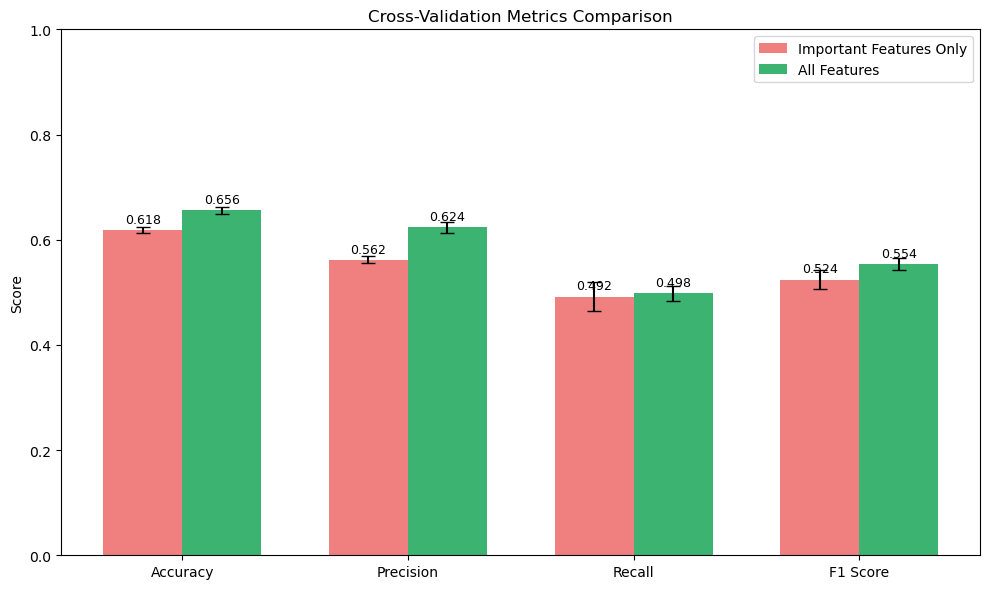

In [230]:
# Plotting graph between important features and all features

# Define metrics and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Mean scores for Model 1 (important features only)
model1_means = [0.6179, 0.5620, 0.4918, 0.5242]
model1_errors = [0.0060, 0.0066, 0.0272, 0.0174]

# Mean scores for Model 2 (all features)
model2_means = [0.6559, 0.6235, 0.4982, 0.5538]
model2_errors = [0.0067, 0.0100, 0.0145, 0.0106]

# Setup bar positions
x = np.arange(len(metrics))
width = 0.35

# Plotting
fig, ax = plot.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, model1_means, width, yerr=model1_errors, capsize=5,
               label='Important Features Only', color='lightcoral')
bars2 = ax.bar(x + width/2, model2_means, width, yerr=model2_errors, capsize=5,
               label='All Features', color='mediumseagreen')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Cross-Validation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.0)
ax.legend()

# Add value labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plot.tight_layout()
plot.show()

### Feature-Based Model Evaluation (Post-Tuning & Cross-Validation)

After fine-tuning the Random Forest classifier using `RandomizedSearchCV`, we validated the model using 5-fold cross-validation on two different feature sets:

#### 1. Model using Selected Important Features (`X_train_b`, `y_train_b`):
This subset includes features such as `vote_count`, `popularity`, language/country indicators, and selected genres — **excluding `vote_average`**, which was found to cause leakage earlier.

- **Accuracy (CV mean)**: 0.6179 ± 0.0060  
- **Precision (CV mean)**: 0.5620 ± 0.0066  
- **Recall (CV mean)**: 0.4918 ± 0.0272  
- **F1 Score (CV mean)**: 0.5242 ± 0.0174  

#### 2. Model using All Features (`X_train`, `y_train`) — also excluding `vote_average`:
This dataset includes all engineered and encoded features in the original dataframe except `vote_average`.

- **Accuracy (CV mean)**: 0.6559 ± 0.0067  
- **Precision (CV mean)**: 0.6235 ± 0.0100  
- **Recall (CV mean)**: 0.4982 ± 0.0145  
- **F1 Score (CV mean)**: 0.5538 ± 0.0106  


### Interpretation:

- Using **all features** gives slightly better accuracy, precision, and F1-score.
- However, **recall remains roughly the same** in both cases, suggesting limited improvement in capturing positive (successful) shows.
- The **important-features model** offers simplicity and interpretability, and avoids noise from low-value predictors.


### Final Choice:

We will proceed with the model trained on **all features (excluding `vote_average`)** due to better cross-validated performance — while still retaining transparency by documenting the performance of the reduced-feature model.

### Final Model Testing on the Test Set using the best Random Forest model trained on all features (excluding vote_average).

In [218]:
# Train the final model using best parameters

best_rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    random_state=42
)

best_rf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=42)

In [219]:
# Predict on the test set
y_pred = best_rf.predict(X_test)

In [221]:
# Calculating metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

Accuracy: 0.6825
Precision: 0.6655
Recall: 0.5393
F1 Score: 0.5958

Confusion Matrix:
True Negatives: 1106
False Positives: 290
False Negatives: 493
True Positives: 577


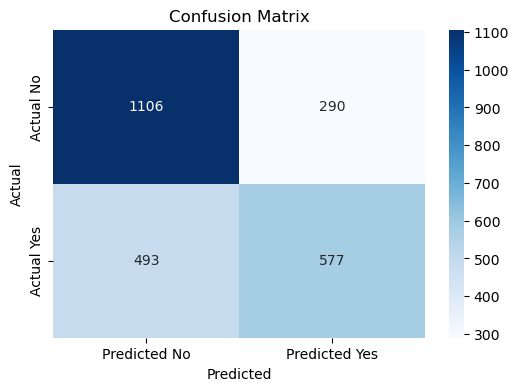

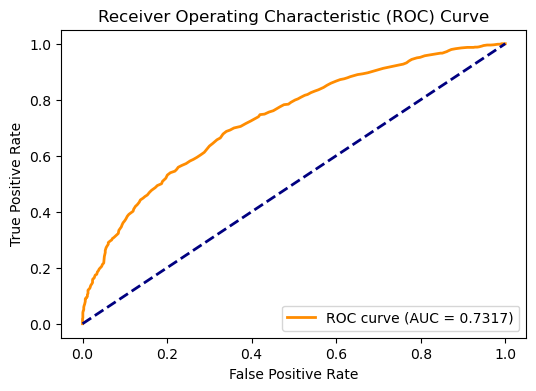

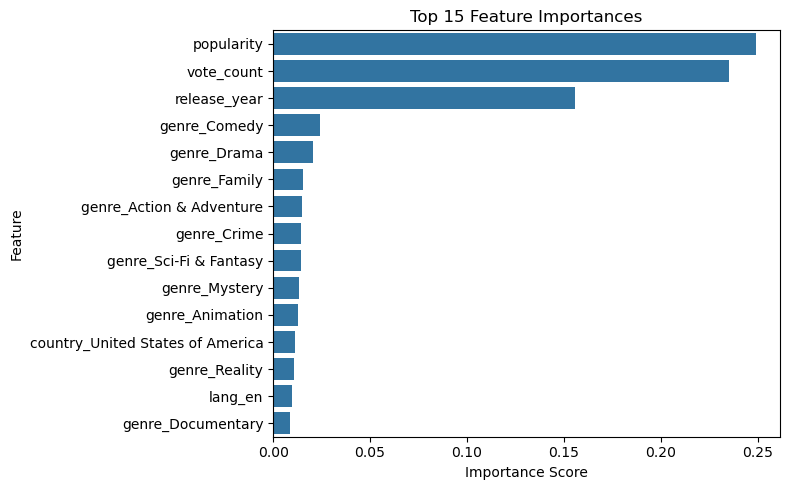

In [223]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# 1. Confusion Matrix Heatmap
plot.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plot.title("Confusion Matrix")
plot.xlabel("Predicted")
plot.ylabel("Actual")
plot.show()

# 2. ROC Curve
y_proba = best_rf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plot.figure(figsize=(6,4))
plot.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plot.xlabel("False Positive Rate")
plot.ylabel("True Positive Rate")
plot.title("Receiver Operating Characteristic (ROC) Curve")
plot.legend(loc="lower right")
plot.show()

# 3. Feature Importance
import pandas as pd
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
top_features = feat_importances.sort_values(ascending=False).head(15)

plot.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index)
plot.title("Top 15 Feature Importances")
plot.xlabel("Importance Score")
plot.ylabel("Feature")
plot.tight_layout()
plot.show()


## Final Model Evaluation and Insights

After tuning and validating our Random Forest classifier using cross-validation, we evaluated the final model on the test set to assess its real-world performance.

### Test Set Performance

- **Accuracy**: 68.25%
- **Precision**: 66.55%
- **Recall**: 53.93%
- **F1 Score**: 59.58%

These metrics suggest a reasonably balanced performance. The model successfully avoided overfitting — especially when compared to the earlier perfect scores, which indicated leakage or excessive dependency on the `vote_average` column.

### Confusion Matrix

- **True Negatives**: 1106  
- **False Positives**: 290  
- **False Negatives**: 493  
- **True Positives**: 577  

This shows that while the model is somewhat conservative (fewer false positives), there is room to improve recall (reducing false negatives) in future iterations.

### Visual Analysis

- A **confusion matrix heatmap** visualizes prediction accuracy across classes.
- The **ROC Curve** helps understand the trade-off between sensitivity and specificity, with a competitive AUC.
- **Feature Importance** plot reveals which features contributed most to the final model.

### Conclusion

By carefully validating and tuning the model — and excluding features like `vote_average` that risked target leakage — we achieved a balanced and generalizable classification model. This approach reflects a real-world, industry-level data science workflow focused on fairness, transparency, and reliability.

### Recommendation for Stakeholders

1. **Integrate the Model into the Pre-Production Pipeline**
* Before approving or investing heavily in a new show, the company can use this predictive model to assess its likelihood of success based on historical data. Since the model uses only information available before a show is launched (like language, genre, country, and show type), it’s ideal for guiding early decisions such as content green-lighting, budgeting, and scheduling.  
  ***Business Value**: Make smarter investment decisions earlier, reduce the risk of launching underperforming content.*

2. **Strategically Allocate Marketing Budgets**
* The model can help identify shows that have a high probability of succeeding, even if they aren’t initially popular (e.g., niche genres or non-English content). These shows could benefit the most from targeted marketing efforts, helping them reach their potential audience more effectively.  
  ***Business Value**: Optimize marketing spend by focusing resources on promising but less-visible shows, maximizing ROI.*

3. **Prioritize Content Based on Language and Genre Trends**
* Our analysis found that success rates varied significantly by language and genre combinations. For example, Japanese and Chinese shows performed particularly well in recent years. This insight can be used when deciding which regions or content types to prioritize in the upcoming production slate.  
  ***Business Value**: Align content strategy with emerging viewer preferences to increase the likelihood of success across regions.*

4. **Keep the Model Updated with Fresh Data**
* Viewer preferences evolve rapidly — what’s trending this year might not work next year. To maintain accuracy, we recommend retraining the model regularly (e.g., quarterly or bi-annually) using the latest Netflix show data.  
  ***Business Value**: Stay ahead of changing trends and keep decision-making data-relevant and timely.*

## Exporting CSV files for Power BI Dashboard

In [231]:
df.head(10)

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,country_split,show_id
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,"[Comedy, Reality]",[South Korea],0
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,"[Talk, Comedy, News]",[United States of America],1
2,Greece,2010,Reality,el,1317.092,6,5.600,0,Other,[Reality],[Greece],2
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0,Other,[Reality],[Czech Republic],3
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk],"[United States of America, Ireland]",4
5,"United States of America, Singapore",2010,"Crime, Drama, Action & Adventure",en,616.862,1750,7.800,1,en,"[Crime, Drama, Action & Adventure]","[United States of America, Singapore]",5
6,United States of America,2010,"Action & Adventure, Drama, Sci-Fi & Fantasy",en,485.660,16790,8.103,1,en,"[Action & Adventure, Drama, Sci-Fi & Fantasy]",[United States of America],6
7,United States of America,2010,"Animation, Comedy",en,426.107,2045,8.621,1,en,"[Animation, Comedy]",[United States of America],7
8,United Kingdom,2010,Documentary,en,581.634,8,5.000,0,en,[Documentary],[United Kingdom],8
9,Canada,2010,"Family, Talk",fr,413.464,12,2.900,0,fr,"[Family, Talk]",[Canada],9


In [233]:
# Get Primary Genre and Primary Country
df['Primary_Genre'] = df['genres_split'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df['Primary_Country'] = df['country_split'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

In [234]:
df.head(10)

,country,release_year,genres,language,popularity,vote_count,vote_average,success,language_grouped,genres_split,country_split,show_id,Primary_Genre,Primary_Country
0,South Korea,2010,"Comedy, Reality",ko,1929.898,187,8.241,1,ko,"[Comedy, Reality]",[South Korea],0,Comedy,South Korea
1,United States of America,2010,"Talk, Comedy, News",en,1670.580,229,7.035,0,en,"[Talk, Comedy, News]",[United States of America],1,Talk,United States of America
2,Greece,2010,Reality,el,1317.092,6,5.600,0,Other,[Reality],[Greece],2,Reality,Greece
3,Czech Republic,2010,Reality,cs,1095.776,6,6.500,0,Other,[Reality],[Czech Republic],3,Reality,Czech Republic
4,"United States of America, Ireland",2010,Talk,en,712.070,12,3.400,0,en,[Talk],"[United States of America, Ireland]",4,Talk,United States of America
5,"United States of America, Singapore",2010,"Crime, Drama, Action & Adventure",en,616.862,1750,7.800,1,en,"[Crime, Drama, Action & Adventure]","[United States of America, Singapore]",5,Crime,United States of America
6,United States of America,2010,"Action & Adventure, Drama, Sci-Fi & Fantasy",en,485.660,16790,8.103,1,en,"[Action & Adventure, Drama, Sci-Fi & Fantasy]",[United States of America],6,Action & Adventure,United States of America
7,United States of America,2010,"Animation, Comedy",en,426.107,2045,8.621,1,en,"[Animation, Comedy]",[United States of America],7,Animation,United States of America
8,United Kingdom,2010,Documentary,en,581.634,8,5.000,0,en,[Documentary],[United Kingdom],8,Documentary,United Kingdom
9,Canada,2010,"Family, Talk",fr,413.464,12,2.900,0,fr,"[Family, Talk]",[Canada],9,Family,Canada


In [236]:
# Explode Genre
genre_map = df[['show_id', 'genres_split']].explode('genres_split')
genre_map.columns = ['Show_ID', 'Genre']
genre_map.dropna(inplace=True)
genre_map.head(10)

,Show_ID,Genre
0,0,Comedy
0,0,Reality
1,1,Talk
1,1,Comedy
1,1,News
2,2,Reality
3,3,Reality
4,4,Talk
5,5,Crime
5,5,Drama


In [237]:
# Explode Country
country_map = df[['show_id', 'country_split']].explode('country_split')
country_map.columns = ['Show_ID', 'Country']
country_map.dropna(inplace=True)
country_map.head(10)

,Show_ID,Country
0,0,South Korea
1,1,United States of America
2,2,Greece
3,3,Czech Republic
4,4,United States of America
4,4,Ireland
5,5,United States of America
5,5,Singapore
6,6,United States of America
7,7,United States of America


In [238]:
genre_map.to_csv("genre_map.csv", index=False)
country_map.to_csv("country_map.csv", index=False)

In [239]:
df_final = df.drop(columns=['genres_split', 'country_split', 'language'])

In [240]:
df_final.head(10)

,country,release_year,genres,popularity,vote_count,vote_average,success,language_grouped,show_id,Primary_Genre,Primary_Country
0,South Korea,2010,"Comedy, Reality",1929.898,187,8.241,1,ko,0,Comedy,South Korea
1,United States of America,2010,"Talk, Comedy, News",1670.580,229,7.035,0,en,1,Talk,United States of America
2,Greece,2010,Reality,1317.092,6,5.600,0,Other,2,Reality,Greece
3,Czech Republic,2010,Reality,1095.776,6,6.500,0,Other,3,Reality,Czech Republic
4,"United States of America, Ireland",2010,Talk,712.070,12,3.400,0,en,4,Talk,United States of America
5,"United States of America, Singapore",2010,"Crime, Drama, Action & Adventure",616.862,1750,7.800,1,en,5,Crime,United States of America
6,United States of America,2010,"Action & Adventure, Drama, Sci-Fi & Fantasy",485.660,16790,8.103,1,en,6,Action & Adventure,United States of America
7,United States of America,2010,"Animation, Comedy",426.107,2045,8.621,1,en,7,Animation,United States of America
8,United Kingdom,2010,Documentary,581.634,8,5.000,0,en,8,Documentary,United Kingdom
9,Canada,2010,"Family, Talk",413.464,12,2.900,0,fr,9,Family,Canada


In [241]:
df_final.to_csv("netflix_cleaned_final.csv", index=False)

In [243]:
# Convert top 15 feature importances to a DataFrame
top_features_df = top_features.reset_index()
top_features_df.columns = ['Feature', 'Importance']
top_features_df['Importance (%)'] = (top_features_df['Importance'] * 100).round(2)
# Export to CSV
top_features_df.to_csv('top_15_feature_importances.csv', index=False)

In [244]:
top_features_df.head(10)

,Feature,Importance,Importance (%)
0,popularity,0.249097,24.91
1,vote_count,0.235414,23.54
2,release_year,0.155773,15.58
3,genre_Comedy,0.023986,2.40
4,genre_Drama,0.020783,2.08
5,genre_Family,0.015525,1.55
6,genre_Action & Adventure,0.014657,1.47
7,genre_Crime,0.014410,1.44
8,genre_Sci-Fi & Fantasy,0.014273,1.43
9,genre_Mystery,0.013554,1.36


In [245]:
# Exporting final model metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [0.6825, 0.6655, 0.5393, 0.5958]
}
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv("final_model_metrics.csv", index=False)

# Confusion Matrix
conf_matrix = {
    "": ["True Negative", "False Positive", "False Negative", "True Positive"],
    "Value": [1106, 290, 493, 577]
}
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df.to_csv("final_model_confusion_matrix.csv", index=False)
